# **DataCamp Project**

**Prepared by :**
- Mohamad EL OSMAN
- Elie NAKAD
- Maroun ABOU BOUTROS
- Cynthia OBEID
- Gaya HABER
- Ibrahim CELIK



In [77]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sb
import plotly.express as px
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

**Attribute Information:**

We use 49 + outcome attribute= 50
- outcome (Binary)
- age (Binary)
- gendera (Binary)
- BMI (float64)
- hypertensive (Binary)
- atrialfibrillation (Binary)
- CHD with no MI (Binary)
- diabetes (Binary)
- deficiencyanemias (Binary)
- depression (Binary)
- Hyperlipemia (Binary)
- Renal failure (Binary)
- COPD (Binary)
- heart rate (float64)
- Systolic blood pressure (float64)
- Diastolic blood pressure (float64)
- Respiratory rate (float64)
- temperature (float64)
- SP O2 (float64)
- Urine output (float64)
- hematocrit (float64)
- RBC (float64)
- MCH (float64)
- MCHC (float64)
- MCV (float64)
- RDW (float64)
- Leucocyte (float64)
- Platelets (float64)
- Neutrophils (float64)
- Basophils (float64)
- Lymphocyte (float64)
- PT (float64)
- INR (float64)
- NT-proBNP (float64)
- Creatine kinase (float64)
- Creatinine (float64)
- Urea nitrogen (float64)
- glucose (float64)
- Blood potassium (float64)
- Blood sodium (float64)
- Blood calcium (float64)
- Chloride (float64)
- Anion gap (float64)
- Magnesium ion (float64)
- PH (float64)
- Bicarbonate (float64)
- Lactic acid (float64)
- PCO2 (float64)
- EF (Binary)
- Group (float64)
- ID (float64)

In [6]:
df = pd.read_csv('./data/data.csv')

df.head()
for column_name in df.columns:
  column_name_without_spaces=column_name.strip()
  if column_name_without_spaces != column_name :
    df.columns = df.columns.str.replace(column_name, column_name_without_spaces)

df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [7]:
list_to_drop=['group','ID']
df = df.drop(list_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1176 non-null   float64
 1   age                       1177 non-null   int64  
 2   gendera                   1177 non-null   int64  
 3   BMI                       962 non-null    float64
 4   hypertensive              1177 non-null   int64  
 5   atrialfibrillation        1177 non-null   int64  
 6   CHD with no MI            1177 non-null   int64  
 7   diabetes                  1177 non-null   int64  
 8   deficiencyanemias         1177 non-null   int64  
 9   depression                1177 non-null   int64  
 10  Hyperlipemia              1177 non-null   int64  
 11  Renal failure             1177 non-null   int64  
 12  COPD                      1177 non-null   int64  
 13  heart rate                1164 non-null   float64
 14  Systolic

## **EXPLORATORY DATA ANALYSIS**

In [8]:
df.describe().T.sort_values(by="mean", ascending=False).round(2)

count      mean       std     min      25%  \
NT-proBNP                 1177.0  11014.13  13148.66   50.00  2251.00   
Urine output              1141.0   1899.28   1272.36    0.00   980.00   
Creatine kinase           1012.0    246.78   1484.52    8.00    46.00   
Platelets                 1177.0    241.50    113.12    9.57   168.91   
glucose                   1159.0    148.80     51.49   66.67   113.94   
Blood sodium              1177.0    138.89      4.15  114.67   136.67   
Systolic blood pressure   1161.0    118.00     17.37   75.00   105.39   
Chloride                  1177.0    102.28      5.34   80.27    99.00   
SP O2                     1164.0     96.27      2.30   75.92    95.00   
MCV                       1177.0     89.90      6.53   62.60    86.25   
heart rate                1164.0     84.58     16.02   36.00    72.37   
Neutrophils               1033.0     80.11     11.13    5.00    74.78   
age                       1177.0     74.06     13.43   19.00    65.00   
Diastolic blood pressure  1161.0     59.53     10.68   24.74    52.17   
EF                        1177.0     48.72     12.87   15.00    40.00   
PCO2                       883.0     45.54     12.71   18.75    37.04   
temperature               1158.0     36.68      0.61   33.25    36.29   
Urea nitrogen             1177.0     36.30     21.85    5.36    20.83   
MCHC                      1177.0     32.86      1.40   27.82    32.01   
hematocrit                1177.0     31.91      5.20   20.31    28.16   
BMI                        962.0     30.19      9.33   13.35    24.33   
MCH                       1177.0     29.54      2.62   18.12    28.25   
Bicarbonate               1177.0     26.91      5.17   12.86    23.45   
Respiratory rate          1164.0     20.80      4.00   11.14    17.93   
PT                        1157.0     17.48      7.39   10.10    13.16   
RDW                       1177.0     15.95      2.13   12.09    14.46   
Anion gap                 1177.0     13.93      2.65    6.64    12.25   
Lymphocyte                1032.0     12.23      8.63    0.97     6.65   
Leucocyte                 1177.0     10.71      5.23    0.10     7.44   
Blood calcium             1176.0      8.50      0.57    6.70     8.15   
PH                         885.0      7.38      0.07    7.09     7.33   
Blood potassium           1177.0      4.18      0.41    3.00     3.90   
RBC                       1177.0      3.58      0.63    2.03     3.12   
Magnesium ion             1177.0      2.12      0.25    1.40     1.96   
Lactic acid                948.0      1.85      0.98    0.50     1.20   
Creatinine                1177.0      1.64      1.28    0.27     0.94   
INR                       1157.0      1.63      0.83    0.87     1.14   
gendera                   1177.0      1.53      0.50    1.00     1.00   
hypertensive              1177.0      0.72      0.45    0.00     0.00   
atrialfibrillation        1177.0      0.45      0.50    0.00     0.00   
diabetes                  1177.0      0.42      0.49    0.00     0.00   
Basophils                  918.0      0.41      0.47    0.10     0.20   
Hyperlipemia              1177.0      0.38      0.49    0.00     0.00   
Renal failure             1177.0      0.37      0.48    0.00     0.00   
deficiencyanemias         1177.0      0.34      0.47    0.00     0.00   
outcome                   1176.0      0.14      0.34    0.00     0.00   
depression                1177.0      0.12      0.32    0.00     0.00   
CHD with no MI            1177.0      0.09      0.28    0.00     0.00   
COPD                      1177.0      0.08      0.26    0.00     0.00   

                              50%       75%        max  
NT-proBNP                 5840.00  14968.00  118928.00  
Urine output              1675.00   2500.00    8820.00  
Creatine kinase             89.25    185.19   42987.50  
Platelets                  222.67    304.25    1028.20  
glucose                    136.40    169.50     414.10  
Blood sodium               139.25 

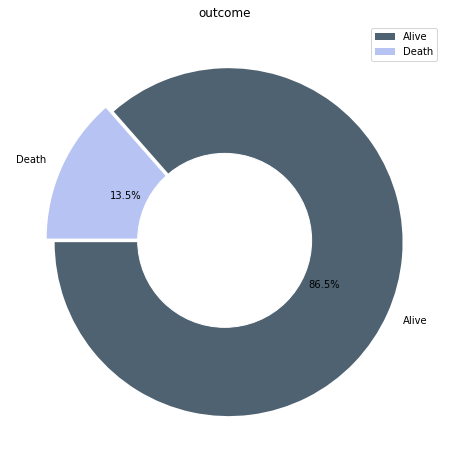

In [9]:
plt.figure(figsize=(12,8))
plt.title("outcome")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.outcome.value_counts(), explode=(0.025,0.025),  labels=['Alive','Death'], colors=['#4F6272', '#B7C3F3'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

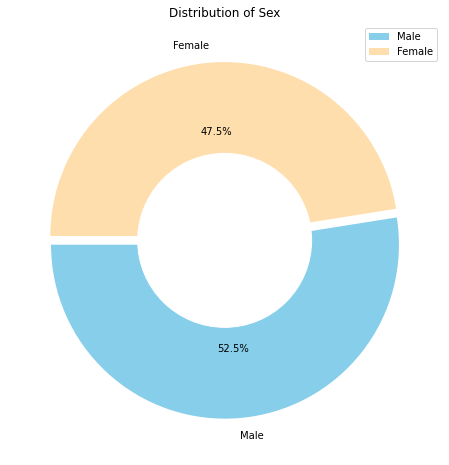

In [10]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Sex")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.gendera.value_counts(), explode=(0.025,0.025),  labels=['Male','Female'], colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

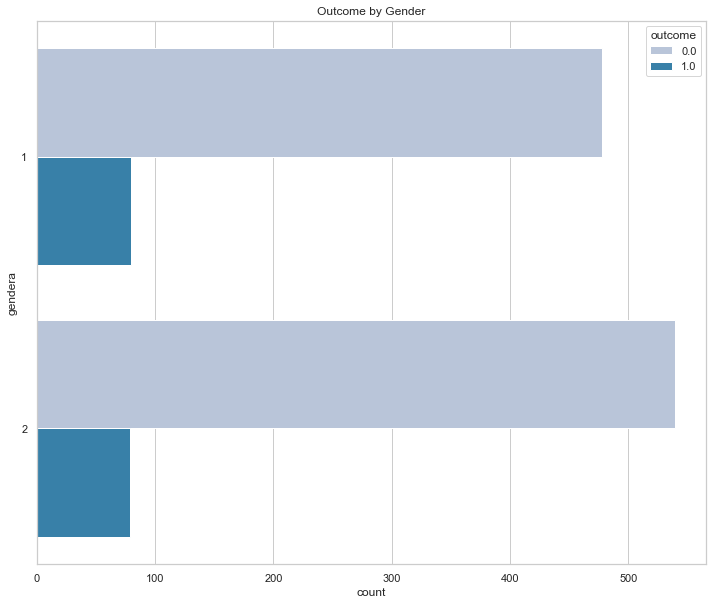

In [11]:
plt.figure(figsize=(12,10))
sb.set_theme(style="whitegrid", color_codes=True)
ax = sb.countplot(y="gendera", hue="outcome", data=df, palette="PuBu")
plt.title("Outcome by Gender")
plt.show()

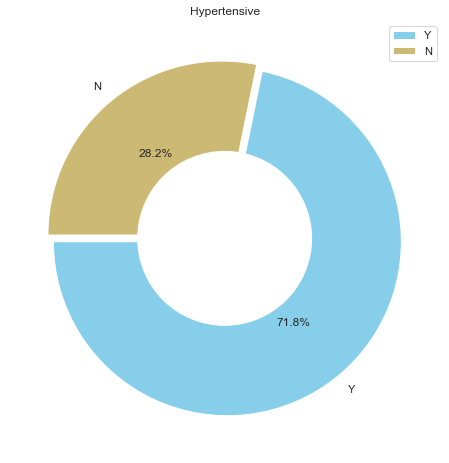

In [12]:
plt.figure(figsize=(12,8))
plt.title("Hypertensive")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.hypertensive.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['skyblue','y'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [13]:
df_aux = df
age_groups=[]
i=0
for age in df['age']:
  if age>=20 and age<30:
    df_aux['age'][i]= 0
  elif age>=30 and age<40:
    df_aux['age'][i]= 2
  elif age>=40 and age<50:
    df_aux['age'][i]= 3
  elif age>=50 and age<60:
    df_aux['age'][i]= 4
  elif age>=60 and age<70:
    df_aux['age'][i]= 5
  elif age>=70 and age<80:
    df_aux['age'][i]= 6
  elif age>=80 and age<90:
    df_aux['age'][i]= 7
  elif age>=90 and age<100:
    df_aux['age'][i]= 8

ageGroup = df_aux.groupby('age')['outcome'].sum()
#plt.figure(figsize=(12,10))
#sb.countplot(ageGroup,hue=df['outcome'],palette="coolwarm_r")
#plt.title("outcome by AgeGroup")
#plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 6
C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 6
C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 7
C:\Users\user\AppData\Local\Temp\ipykern

C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 7
C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 8
C:\Users\user\AppData\Local\Temp\ipykernel_17264\3728728660.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['age'][i]= 7
C:\Users\user\AppData\Local\Temp\ipykern

## **Preprocessing**

### **Dropping columns of the dataset with high NULL value count**

In [14]:
threshold=0.23
list_to_drop = []

for column in df.columns:
  if df[column].isnull().sum() >= (threshold)*df.shape[0]:
    list_to_drop.append(df[column].name)

df = df.drop(list_to_drop, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1176 non-null   float64
 1   age                       1177 non-null   int64  
 2   gendera                   1177 non-null   int64  
 3   BMI                       962 non-null    float64
 4   hypertensive              1177 non-null   int64  
 5   atrialfibrillation        1177 non-null   int64  
 6   CHD with no MI            1177 non-null   int64  
 7   diabetes                  1177 non-null   int64  
 8   deficiencyanemias         1177 non-null   int64  
 9   depression                1177 non-null   int64  
 10  Hyperlipemia              1177 non-null   int64  
 11  Renal failure             1177 non-null   int64  
 12  COPD                      1177 non-null   int64  
 13  heart rate                1164 non-null   float64
 14  Systolic

### **Split features between binary and numeric categories**

In [16]:
dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
numAttr=[]
binaryAttr=[]
for key in dtypes:
  uniqueValues = df[key].dropna().unique()
  if(key=="outcome"):
    binaryAttr.append(key)
  elif((dtypes[key] == 'int64' or dtypes[key] == 'float64') and len(uniqueValues)==2):
    binaryAttr.append(key)
  else:
    numAttr.append(key)

print('The binary attributes are:'+str(binaryAttr))
print('The numerical attributes are:'+str(numAttr))

The binary attributes are:['outcome', 'gendera', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
The numerical attributes are:['age', 'BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'Bicarbonate', 'Lactic acid', 'EF']


### **Identifying outliers**



In [17]:
df.isnull().values.sum()

1343

#### Standard Deviation Method

Identified outliers in age: 3 [3, 19, 19]
Identified outliers in BMI: 8 [83.26462934, 91.17665294, 76.53061224, 104.970366, 69.96541771, 70.70854638, 68.16131511, 70.84838859]
Identified outliers in heart rate: 0 []
Identified outliers in Systolic blood pressure: 1 [203.0]


Identified outliers in Diastolic blood pressure: 1 [107.0]
Identified outliers in Respiratory rate: 1 [40.9]
Identified outliers in temperature: 3 [33.25, 39.13247842, 34.15072482]
Identified outliers in SP O2: 3 [83.84615385, 75.91666667, 83.06666667]
Identified outliers in Urine output: 5 [8760.0, 7925.0, 7400.0, 7350.0, 8820.0]
Identified outliers in hematocrit: 1 [55.425]
Identified outliers in RBC: 2 [6.154444444, 6.575]
Identified outliers in MCH: 3 [18.28, 18.125, 40.31428571]
Identified outliers in MCHC: 0 []
Identified outliers in MCV: 2 [62.6, 116.7142857]
Identified outliers in RDW: 6 [25.65, 25.275, 25.24285714, 29.05, 27.05555556, 24.98]
Identified outliers in Leucocyte: 7 [33.34, 42.9, 64.75, 39.05, 36.87222222, 39.0875, 51.46153846]
Identified outliers in Platelets: 6 [747.2, 751.0, 888.875, 933.5, 1028.2, 863.75]
Identified outliers in Neutrophils: 7 [17.21666667, 28.33333333, 14.57142857, 12.5, 32.575, 5.0, 10.0]
Identified outliers in Basophils: 3 [3.0, 8.8, 7.0]
Iden

C:\Users\user\AppData\Local\Temp\ipykernel_17264\1357951135.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(i,figsize=(20,7))


Identified outliers in INR: 10 [5.416666667, 5.214285714, 4.983333333, 5.1, 5.2, 8.342857143, 5.6375, 6.4, 6.575, 7.390909091]
Identified outliers in NT-proBNP: 6 [68095.0, 63622.0, 67231.0, 68886.0, 66004.0, 118928.0]
Identified outliers in Creatine kinase: 2 [16829.0, 42987.5]
Identified outliers in Creatinine: 12 [7.984615385, 7.5, 7.933333333, 9.2, 15.52727273, 9.0125, 7.0, 12.45, 8.183333333, 12.8375, 8.385714286, 8.257142857]
Identified outliers in Urea nitrogen: 2 [161.75, 146.5454545]
Identified outliers in glucose: 3 [414.1, 369.0, 365.75]
Identified outliers in Blood potassium: 3 [5.866666667, 5.94, 6.566666667]
Identified outliers in Blood sodium: 4 [118.6, 121.0454545, 119.35, 114.6666667]
Identified outliers in Blood calcium: 1 [10.95]
Identified outliers in Chloride: 1 [80.26666667]
Identified outliers in Anion gap: 5 [25.27272727, 24.875, 25.4, 25.5, 24.72727273]
Identified outliers in Magnesium ion: 4 [3.254545455, 4.072727273, 3.866666667, 3.188888889]
Identified outli

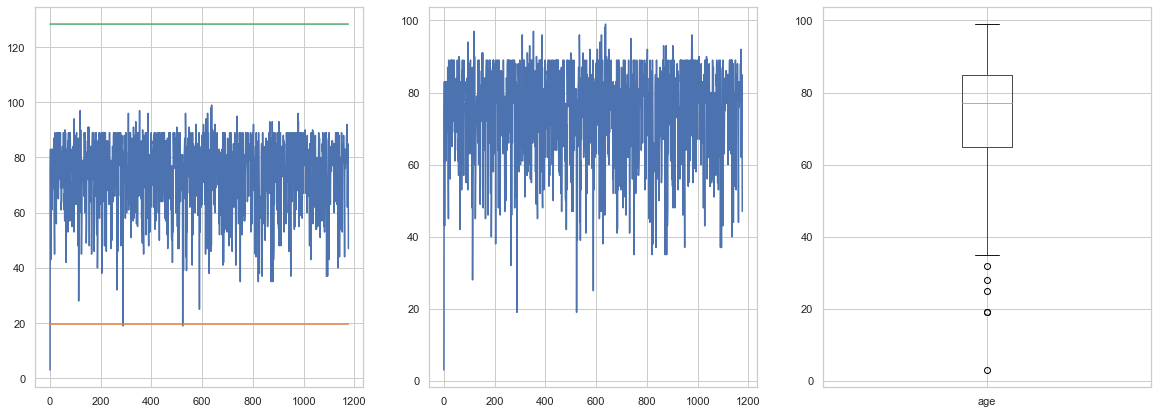

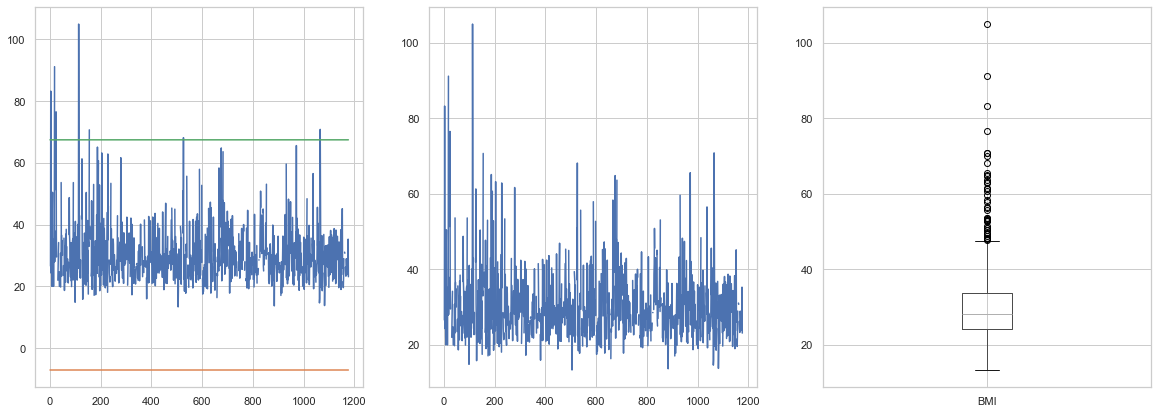

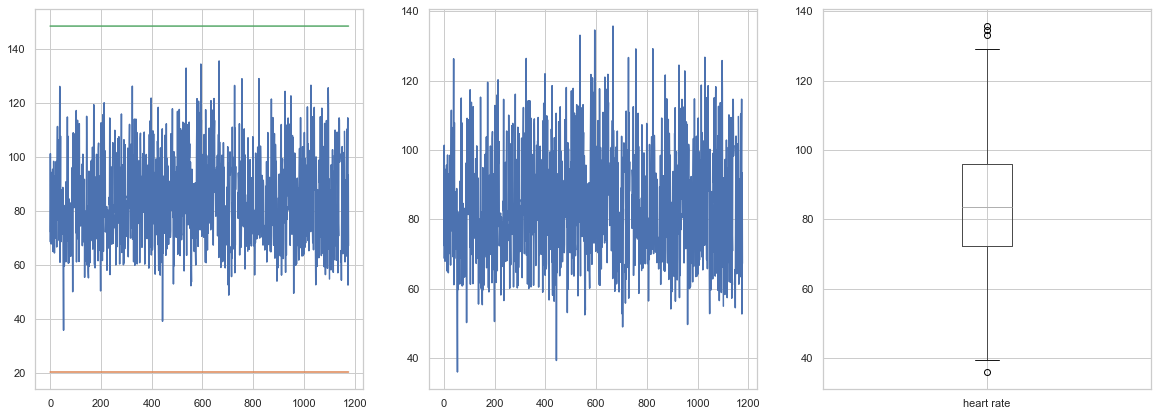

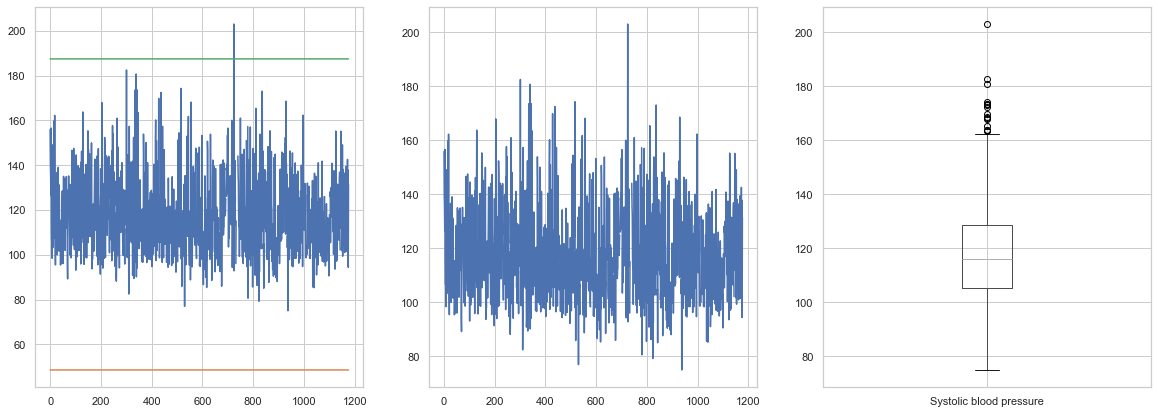

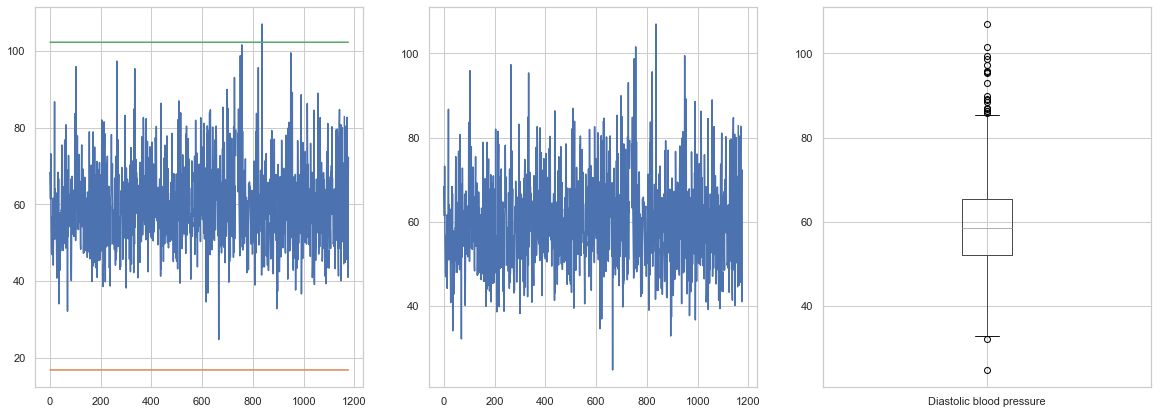

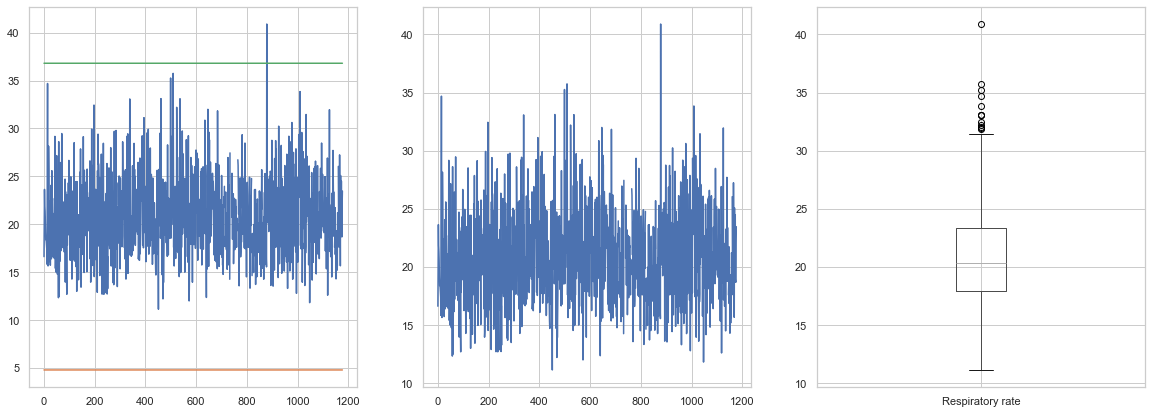

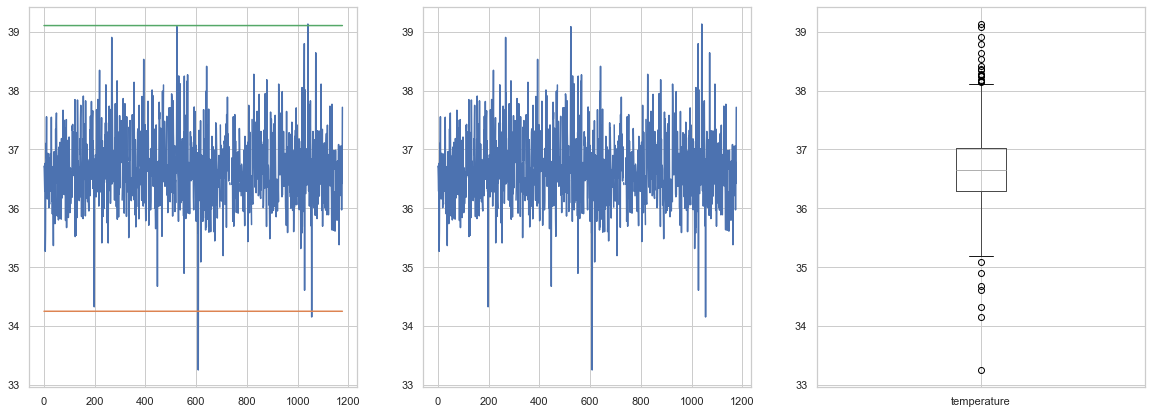

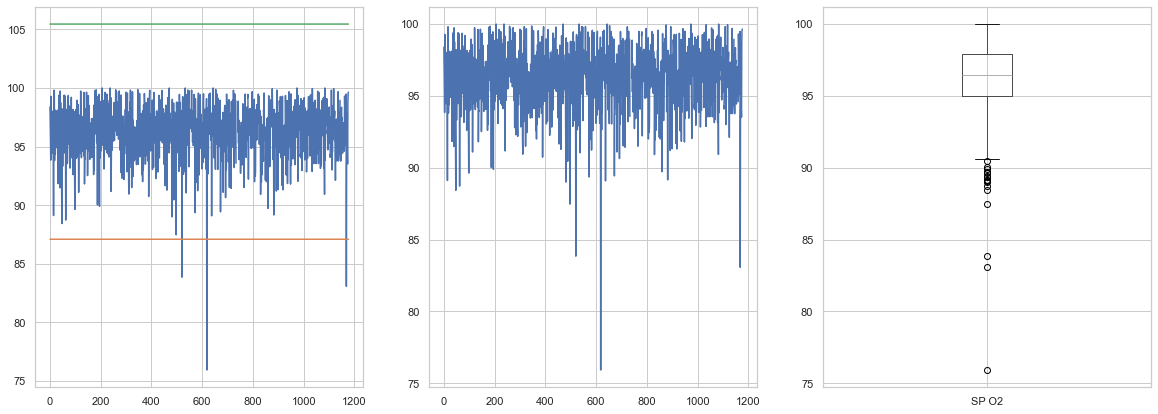

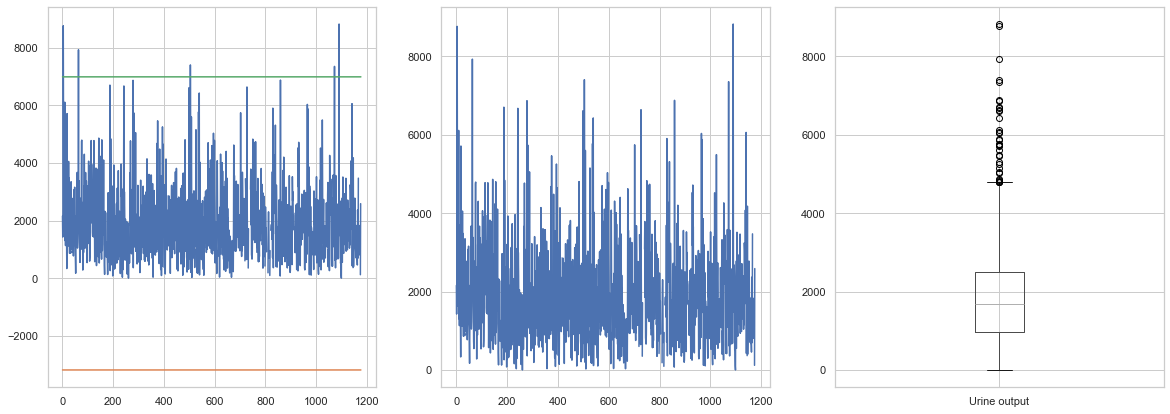

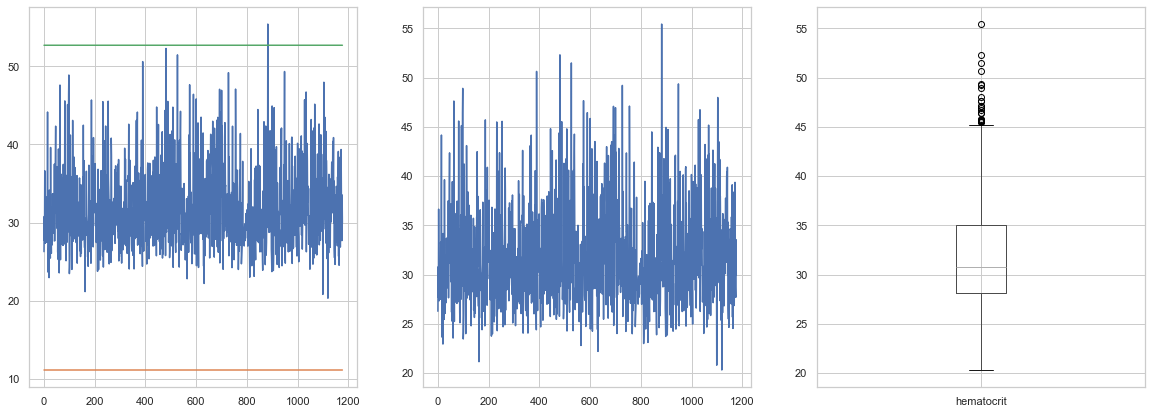

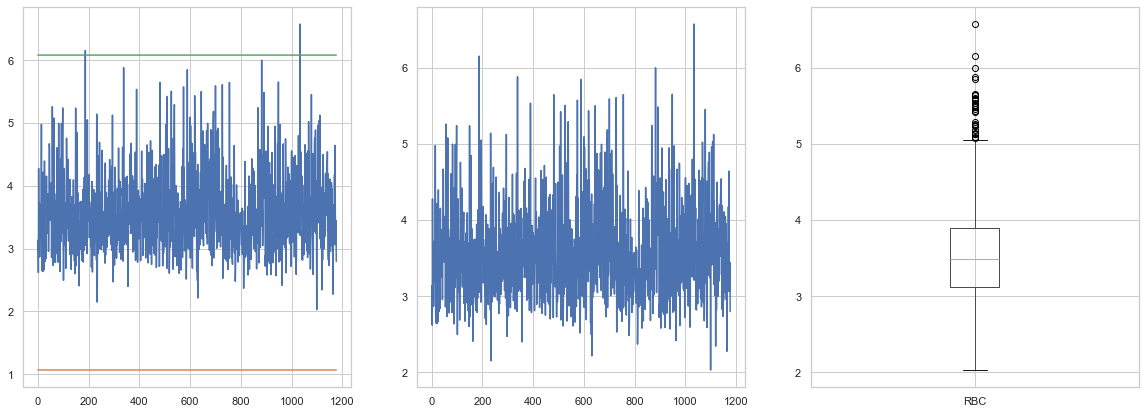

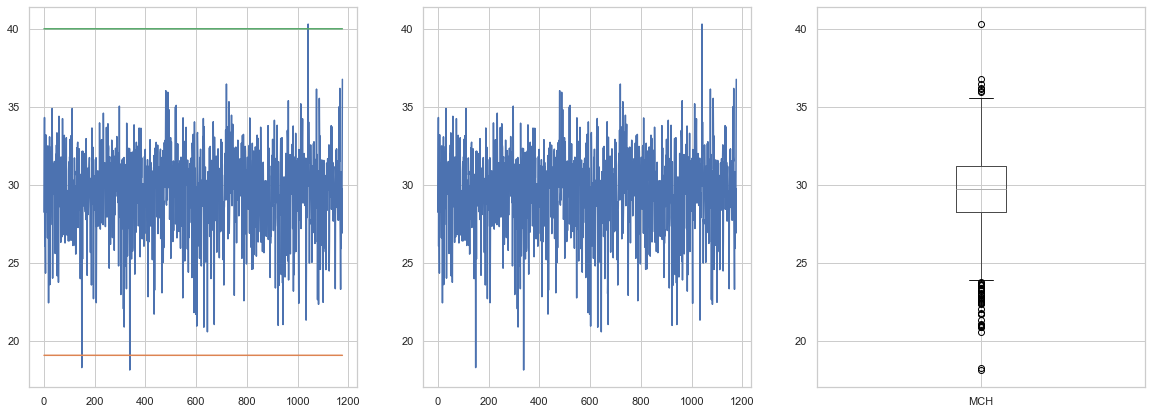

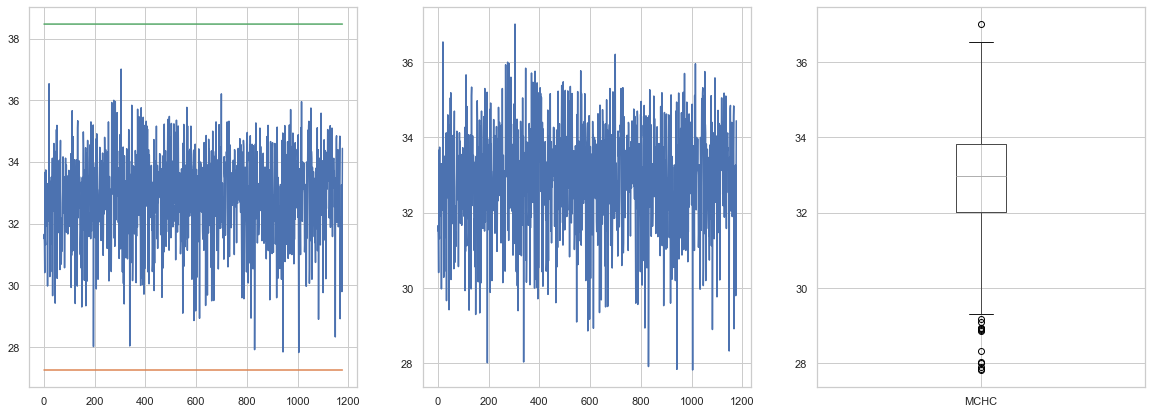

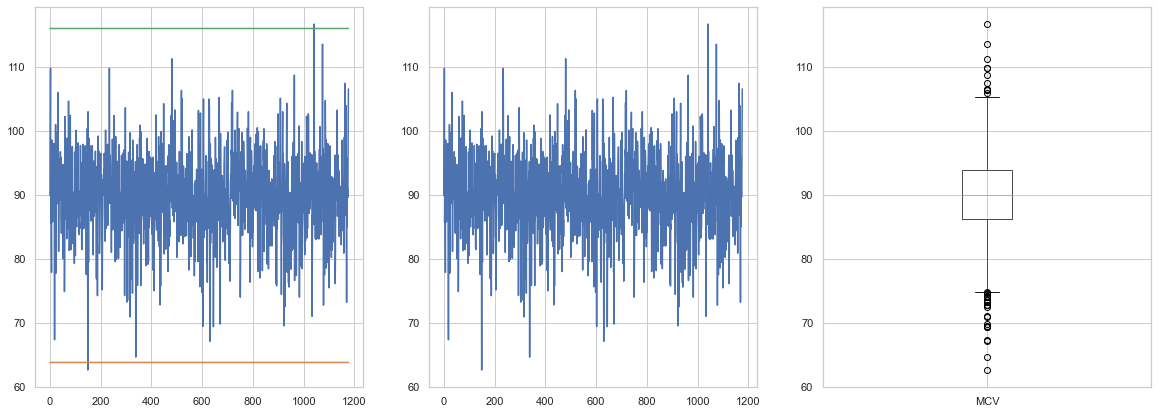

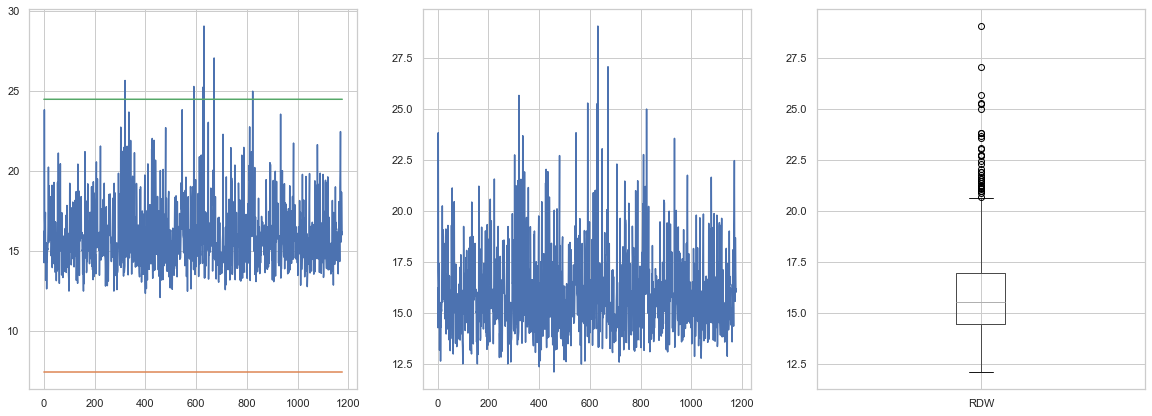

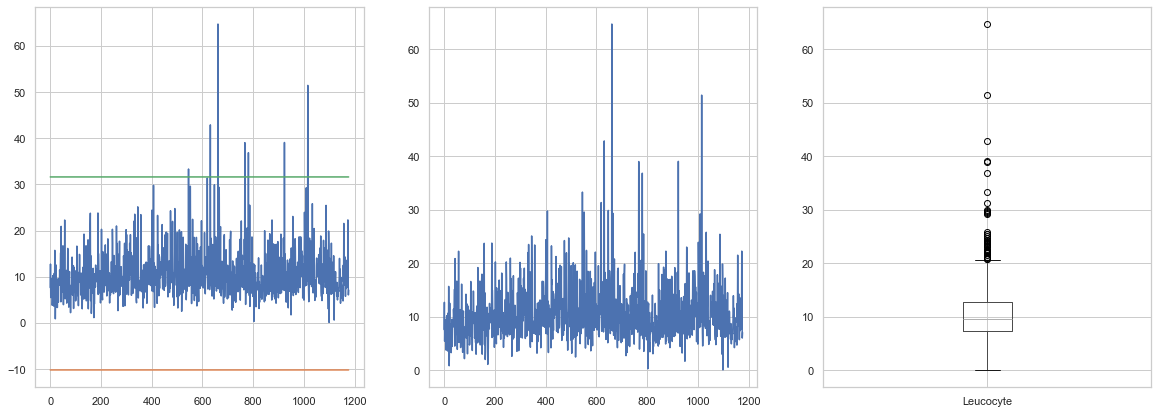

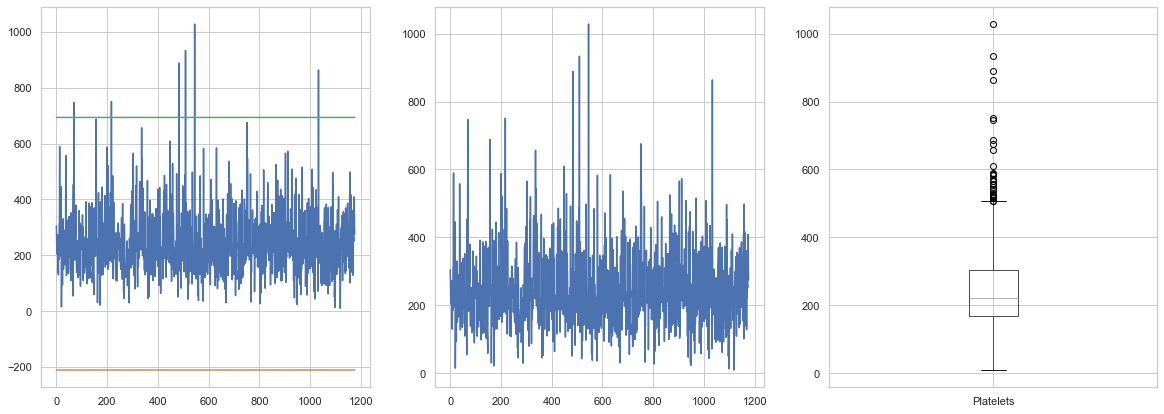

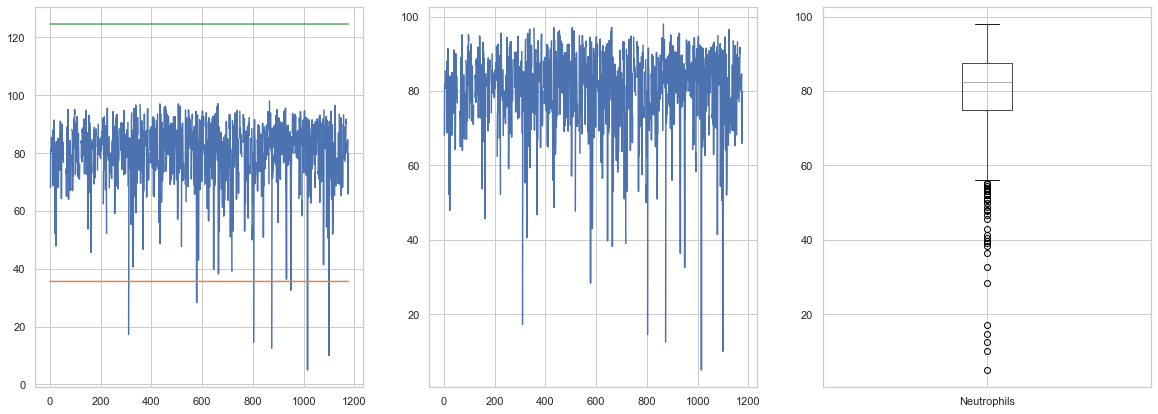

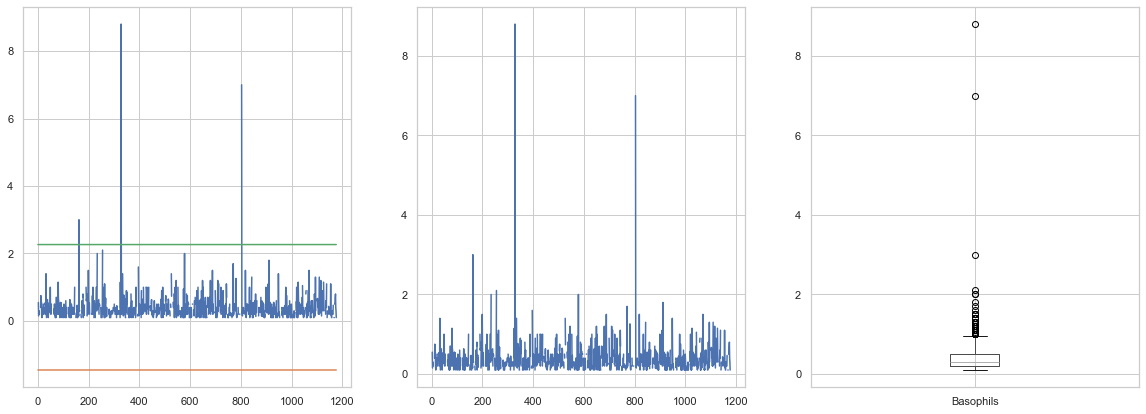

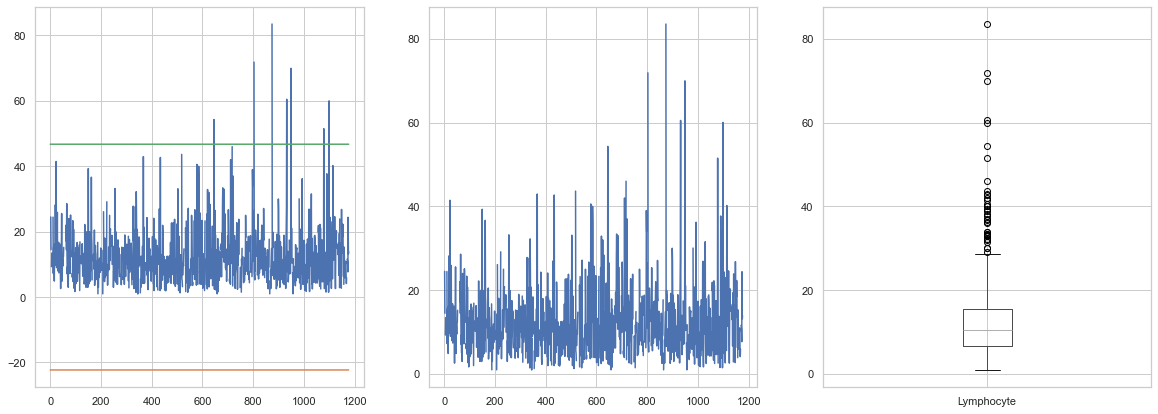

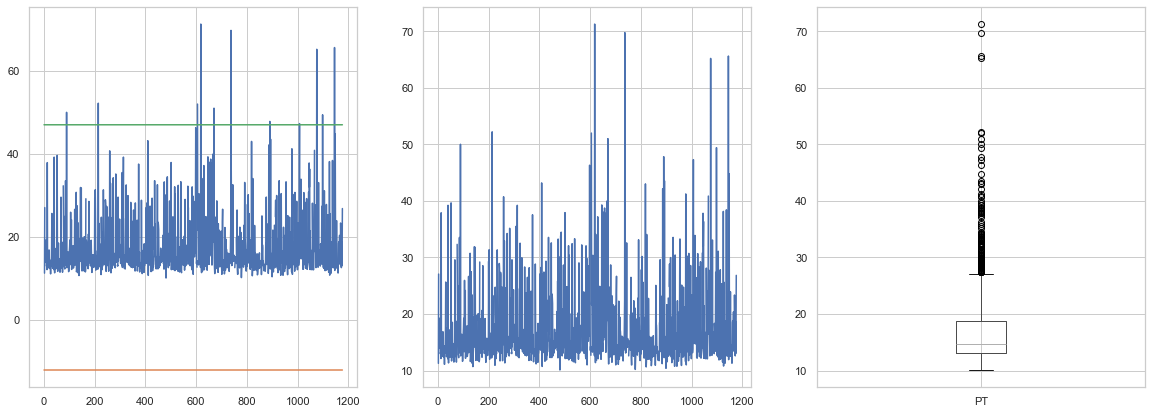

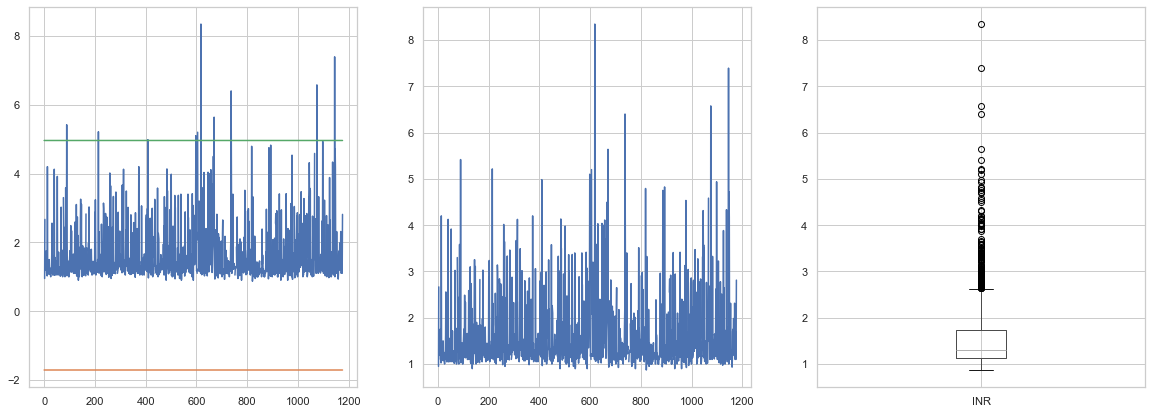

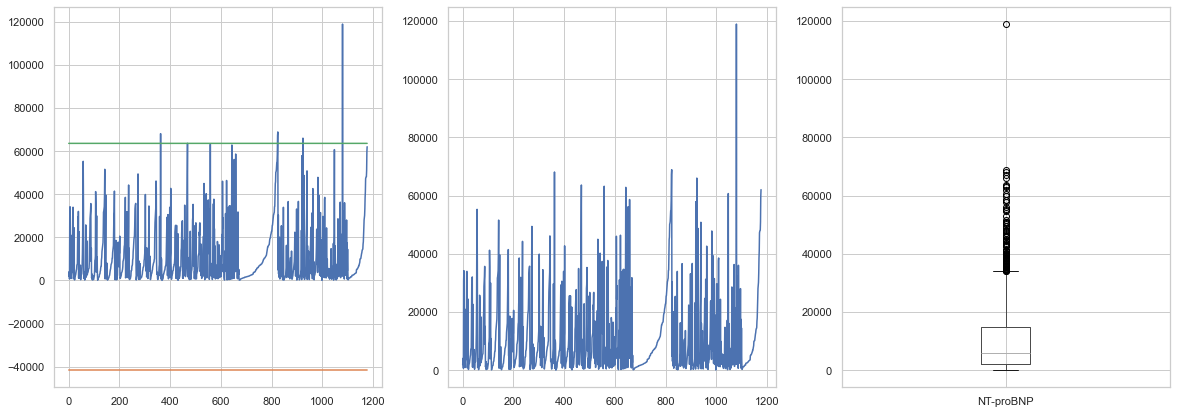

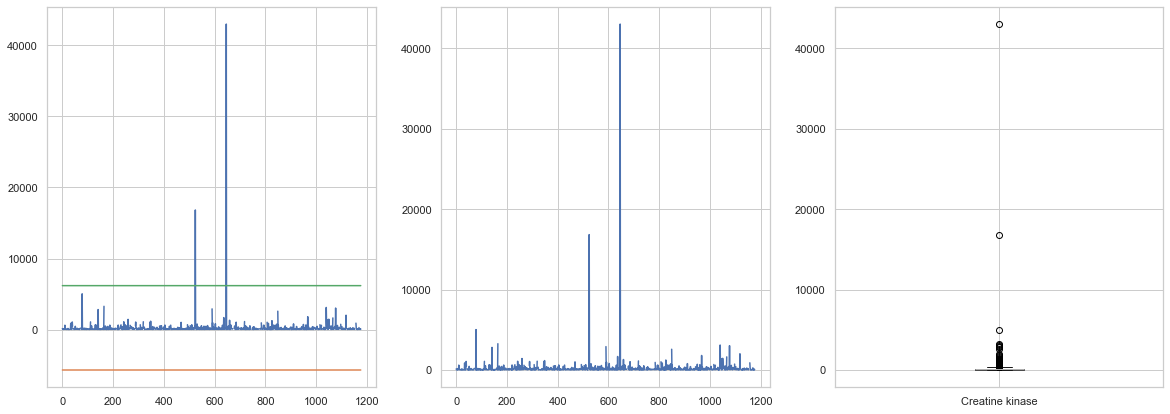

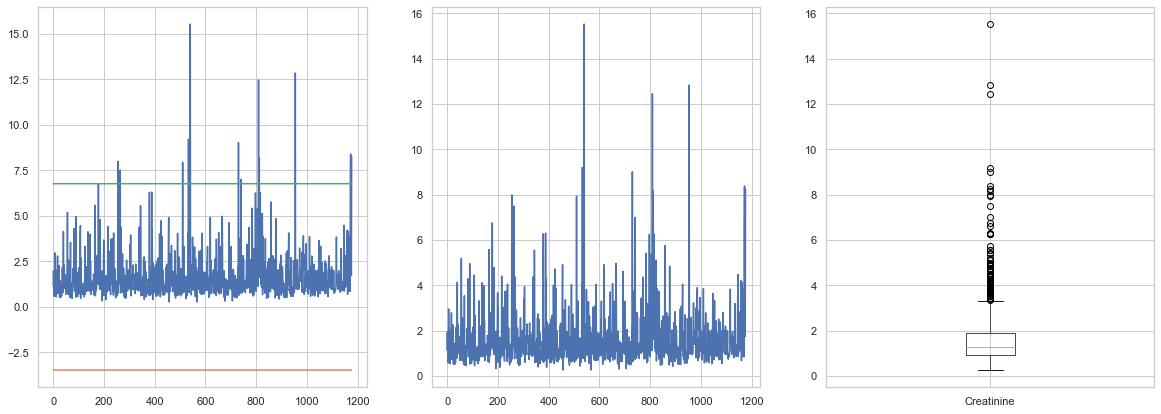

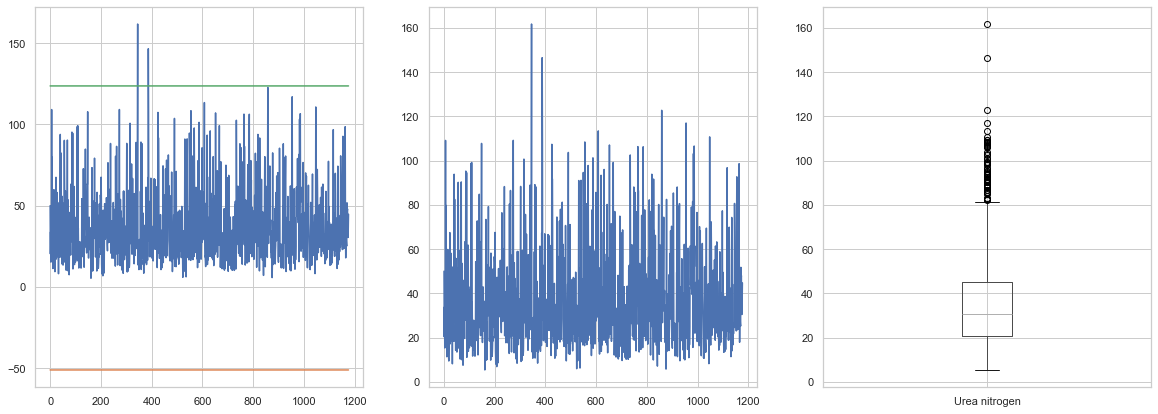

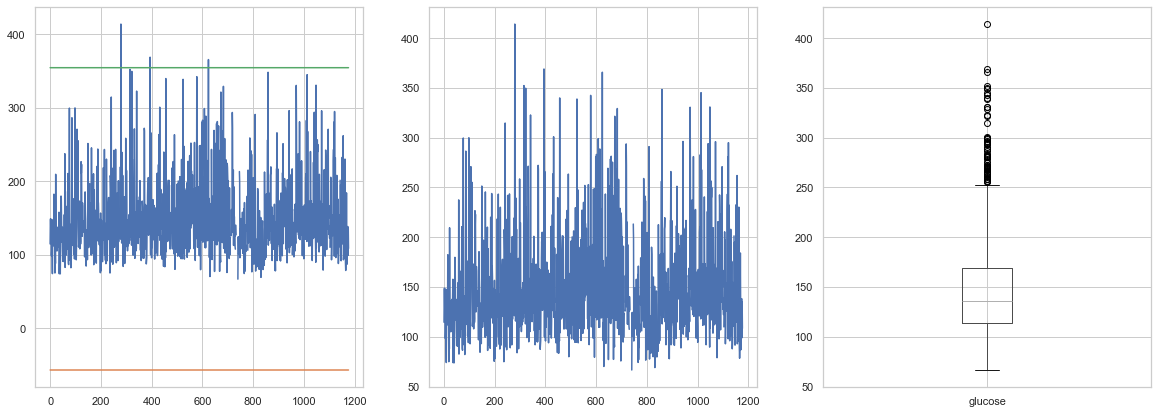

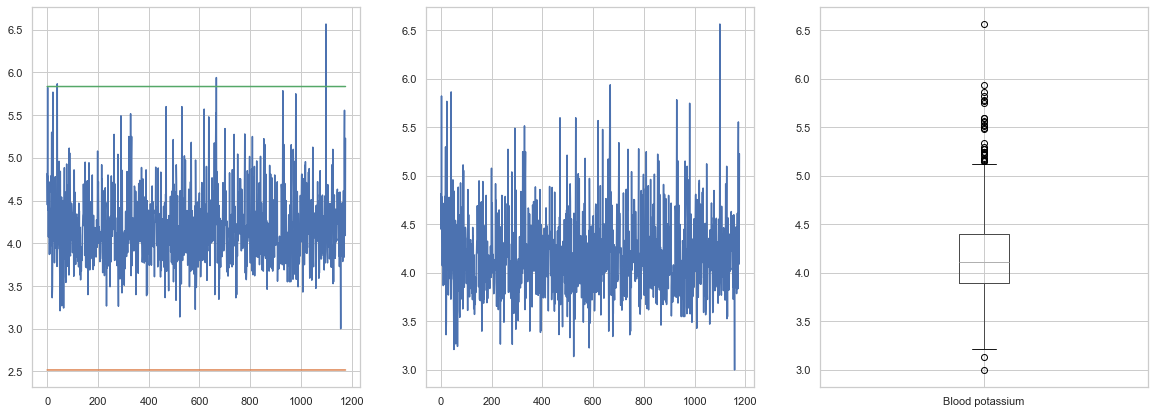

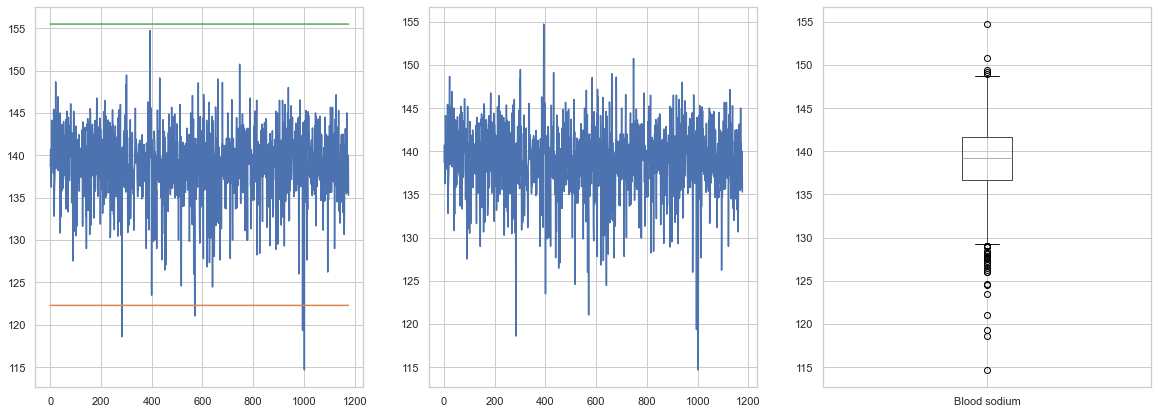

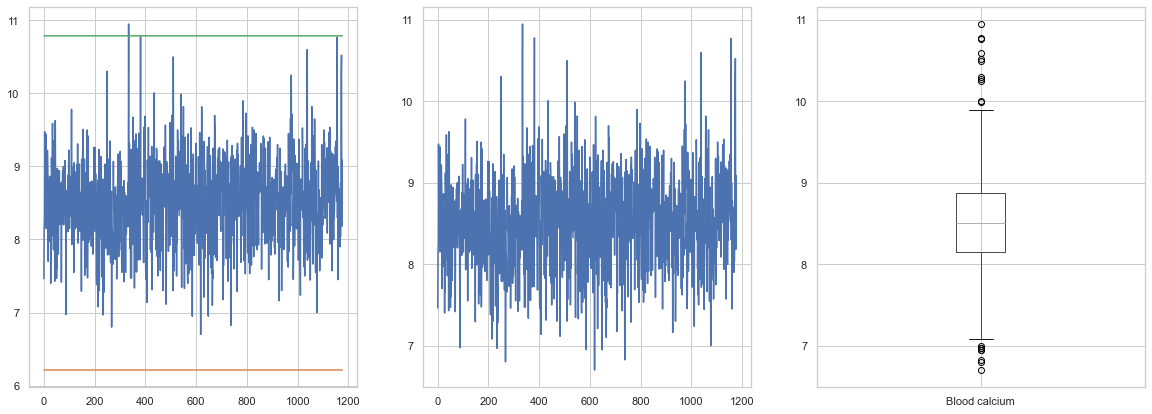

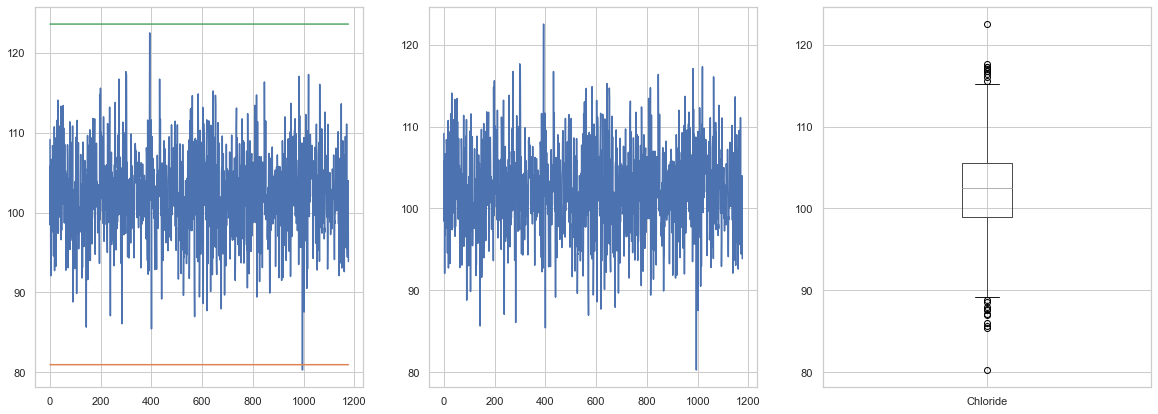

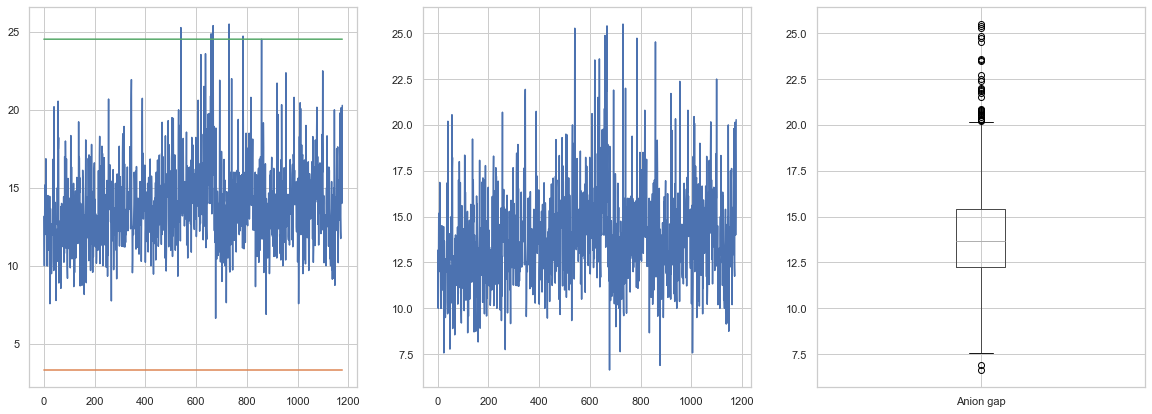

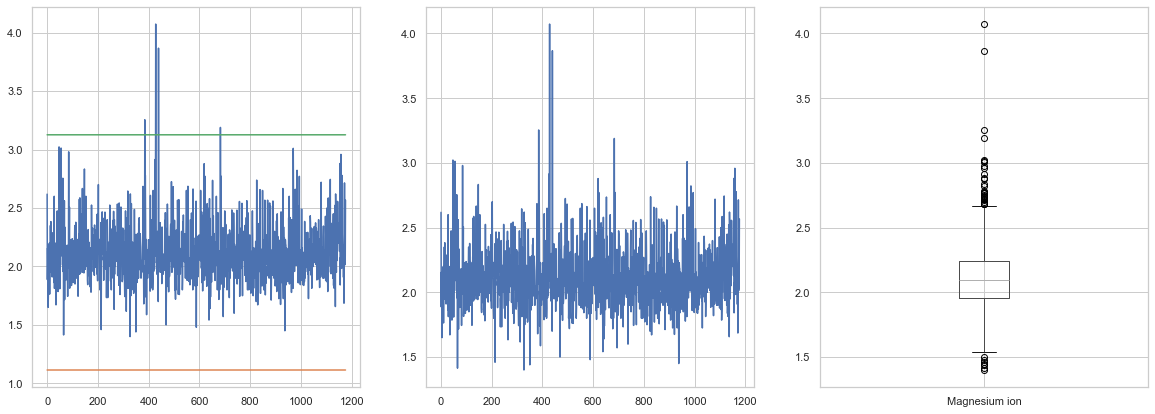

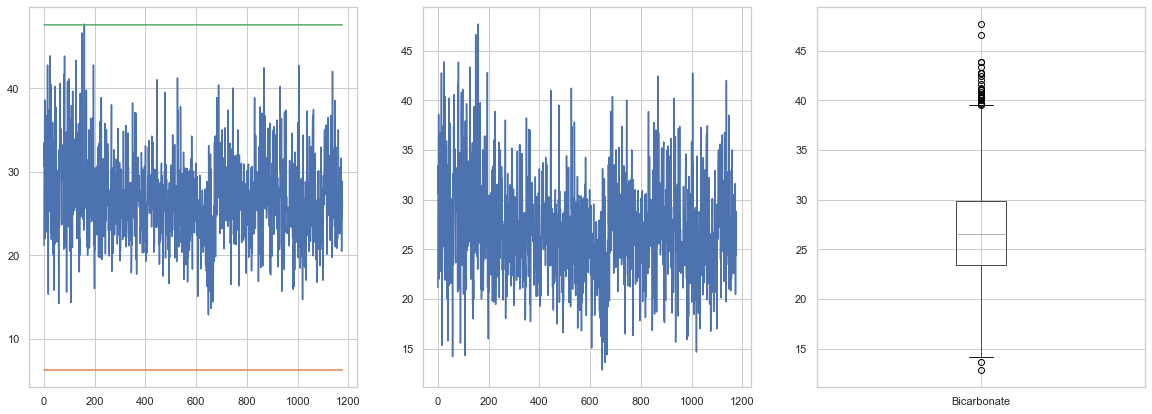

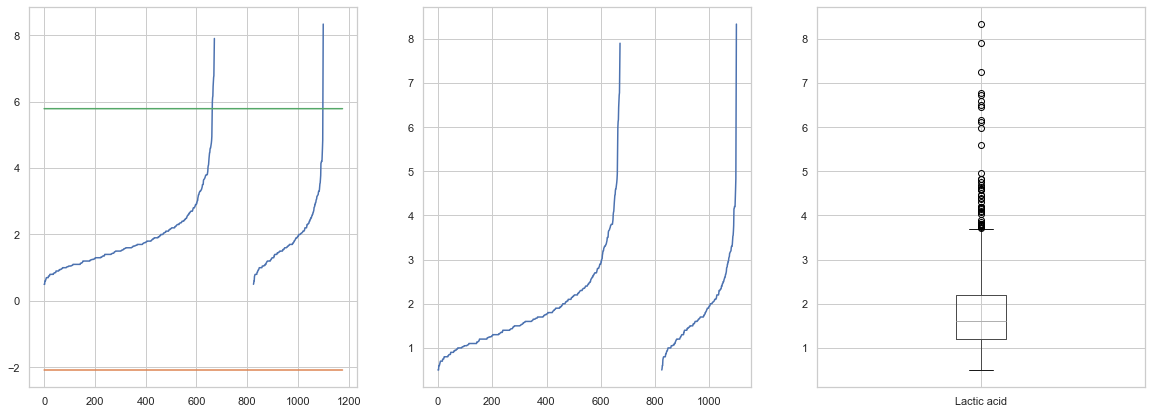

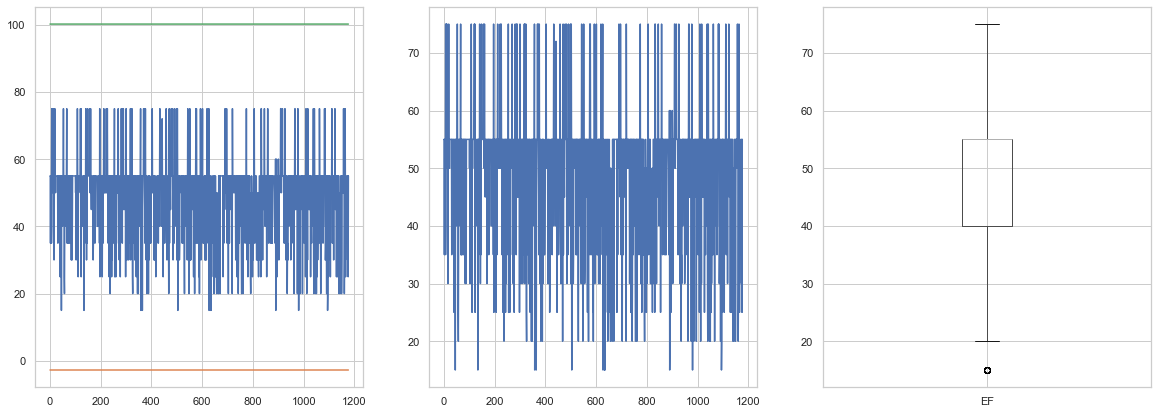

In [18]:
dtypes = df.dtypes.apply(lambda x: x.name).to_dict()


i=0

for key in dtypes:
  if(key in numAttr ):
    fig = plt.figure(i,figsize=(20,7))
    ax = fig.add_subplot(1, 3, 1)
    i+=1
    ax.plot(df[key])

    data_mean, data_std = np.mean(df[key]), np.std(df[key])
    cut_off = data_std * 4
    lower, upper = data_mean - cut_off, data_mean + cut_off
    ax.plot(lower*np.ones(1177))
    ax.plot(upper*np.ones(1177))
    outliers = [x for x in df[key] if x < lower or x > upper]
    outliers_removed = [x for x in df[key] if x > lower and x < upper]

    ax = fig.add_subplot(1, 3, 2)
    ax.plot(df[key])
    ax = fig.add_subplot(1, 3, 3)
    df.boxplot(key)
    print('Identified outliers in {}: {} {}'.format(key,len(outliers),outliers))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1176 non-null   float64
 1   age                       1177 non-null   int64  
 2   gendera                   1177 non-null   int64  
 3   BMI                       962 non-null    float64
 4   hypertensive              1177 non-null   int64  
 5   atrialfibrillation        1177 non-null   int64  
 6   CHD with no MI            1177 non-null   int64  
 7   diabetes                  1177 non-null   int64  
 8   deficiencyanemias         1177 non-null   int64  
 9   depression                1177 non-null   int64  
 10  Hyperlipemia              1177 non-null   int64  
 11  Renal failure             1177 non-null   int64  
 12  COPD                      1177 non-null   int64  
 13  heart rate                1164 non-null   float64
 14  Systolic

#### Interquartile Range Method

Identified outliers in age: 1 [3]
Identified outliers in BMI: 3 [83.26462934, 91.17665294, 104.970366]
Identified outliers in heart rate: 0 []
Identified outliers in Systolic blood pressure: 1 [203.0]
Identified outliers in Diastolic blood pressure: 1 [107.0]
Identified outliers in Respiratory rate: 1 [40.9]
Identified outliers in temperature: 3 [34.32407407, 33.25, 34.15072482]
Identified outliers in SP O2: 3 [83.84615385, 75.91666667, 83.06666667]
Identified outliers in Urine output: 2 [8760.0, 8820.0]
Identified outliers in hematocrit: 0 []
Identified outliers in RBC: 1 [6.575]
Identified outliers in MCH: 1 [40.31428571]
Identified outliers in MCHC: 0 []
Identified outliers in MCV: 0 []
Identified outliers in RDW: 2 [29.05, 27.05555556]
Identified outliers in Leucocyte: 6 [42.9, 64.75, 39.05, 36.87222222, 39.0875, 51.46153846]
Identified outliers in Platelets: 4 [888.875, 933.5, 1028.2, 863.75]
Identified outliers in Neutrophils: 6 [17.21666667, 28.33333333, 14.57142857, 12.5, 5.0, 

C:\Users\user\AppData\Local\Temp\ipykernel_17264\4288349237.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(i,figsize=(20,7))


Identified outliers in NT-proBNP: 1 [118928.0]
Identified outliers in Creatine kinase: 12 [5029.5, 2817.0, 3274.0, 16829.0, 2913.25, 1686.0, 42987.5, 2587.25, 1813.0, 3111.8, 3029.5, 2021.0]
Identified outliers in Creatinine: 11 [7.984615385, 7.5, 7.933333333, 9.2, 15.52727273, 9.0125, 12.45, 8.183333333, 12.8375, 8.385714286, 8.257142857]
Identified outliers in Urea nitrogen: 2 [161.75, 146.5454545]
Identified outliers in glucose: 1 [414.1]
Identified outliers in Blood potassium: 1 [6.566666667]
Identified outliers in Blood sodium: 3 [118.6, 119.35, 114.6666667]
Identified outliers in Blood calcium: 1 [10.95]
Identified outliers in Chloride: 1 [80.26666667]
Identified outliers in Anion gap: 0 []
Identified outliers in Magnesium ion: 3 [3.254545455, 4.072727273, 3.866666667]
Identified outliers in Bicarbonate: 0 []
Identified outliers in Lactic acid: 6 [6.6, 6.725, 6.777777778, 7.25, 7.9, 8.333333333]
Identified outliers in EF: 0 []
[   0    3   18   78  113  141  162  164  198  234  2

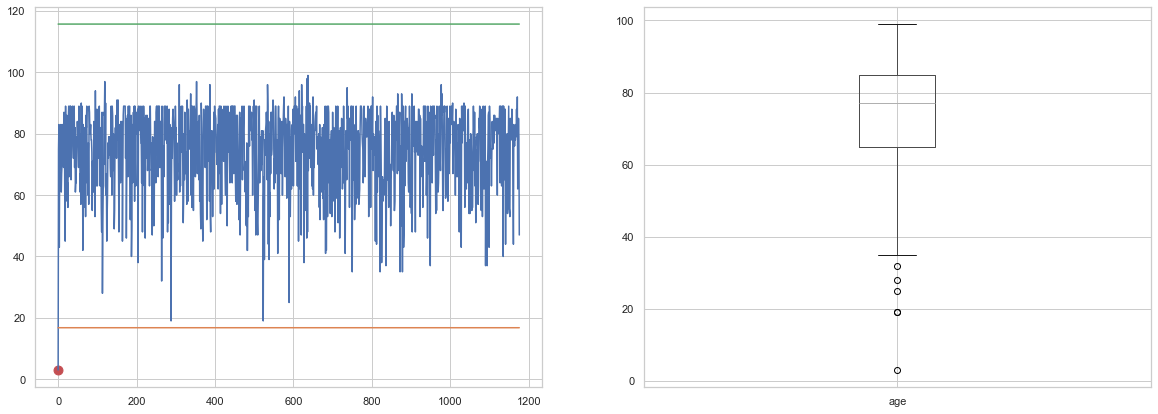

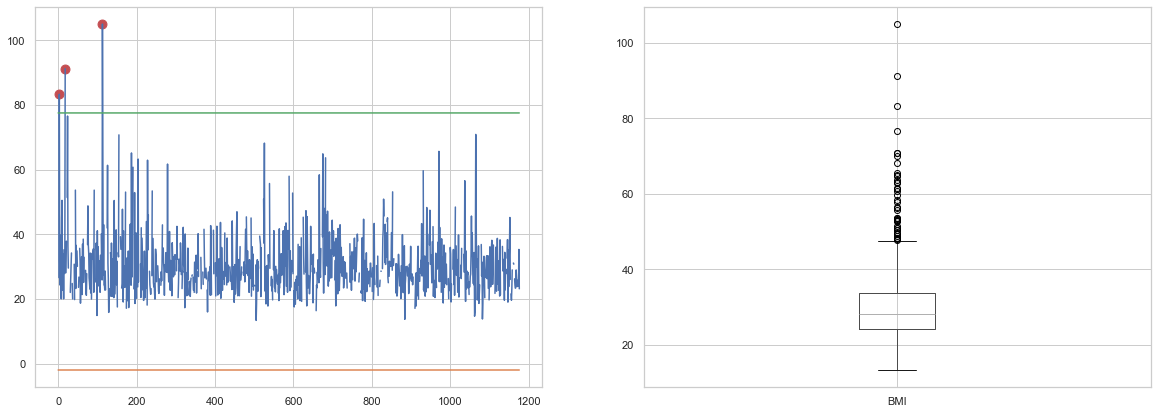

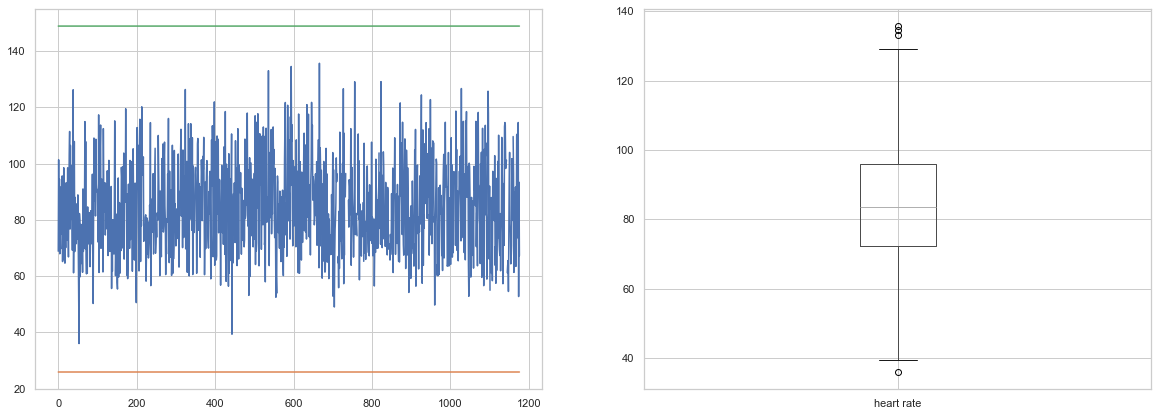

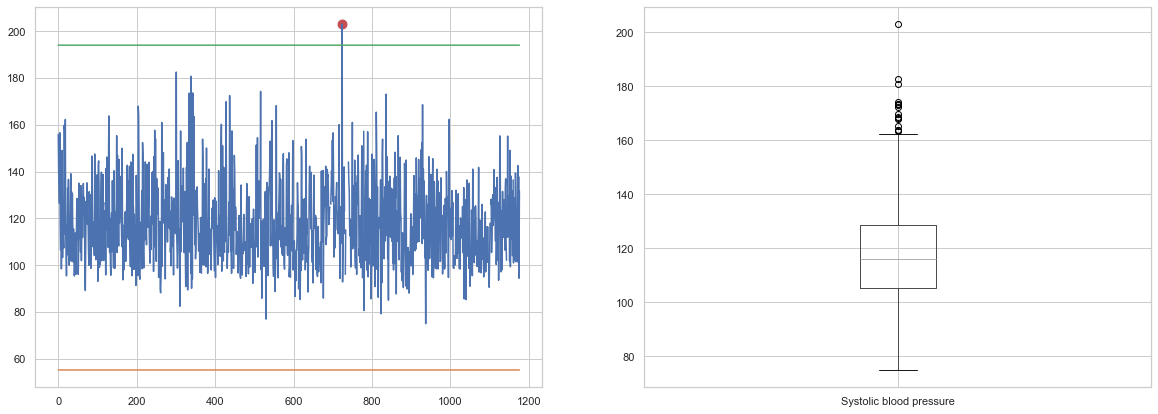

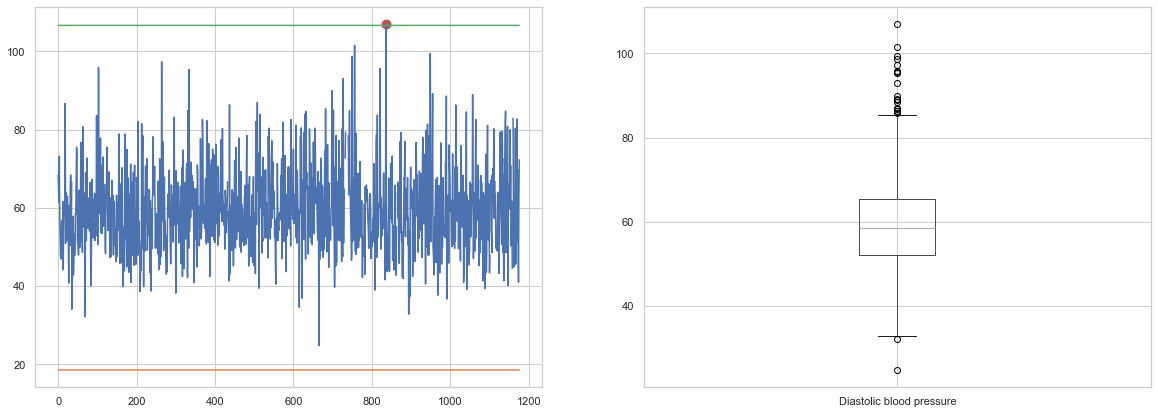

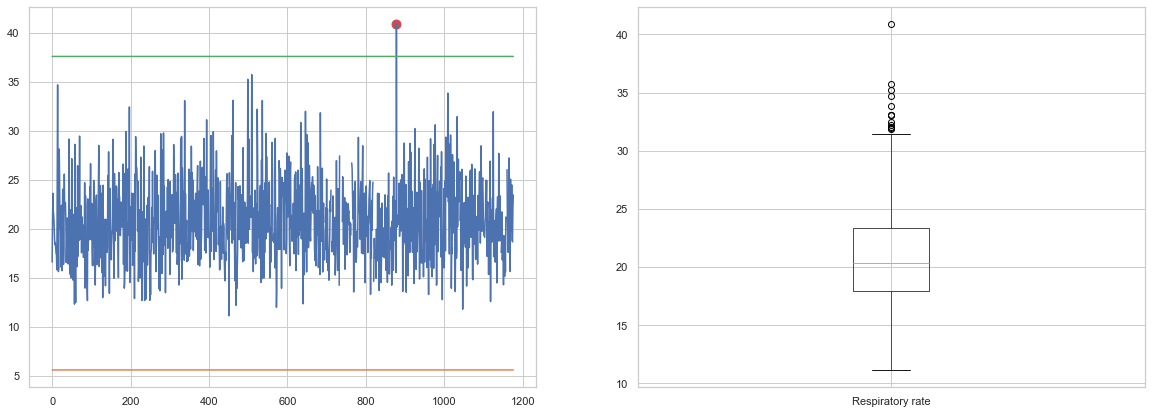

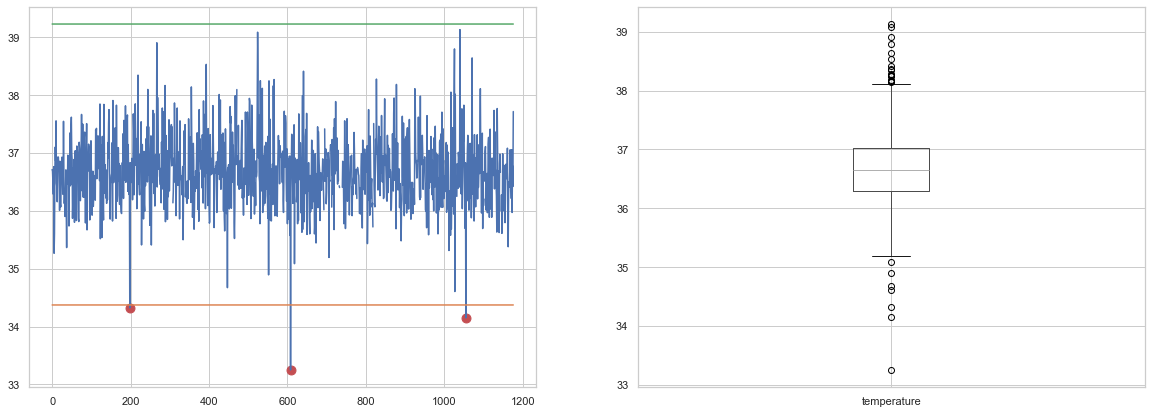

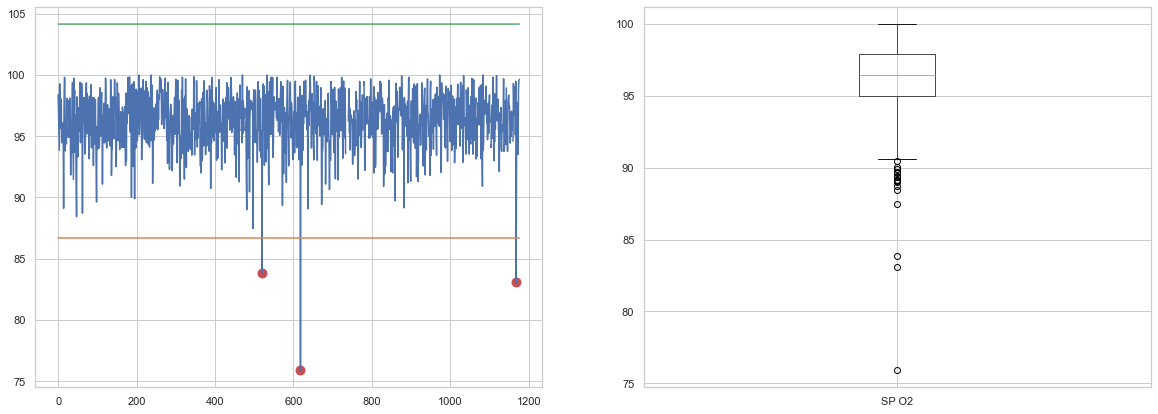

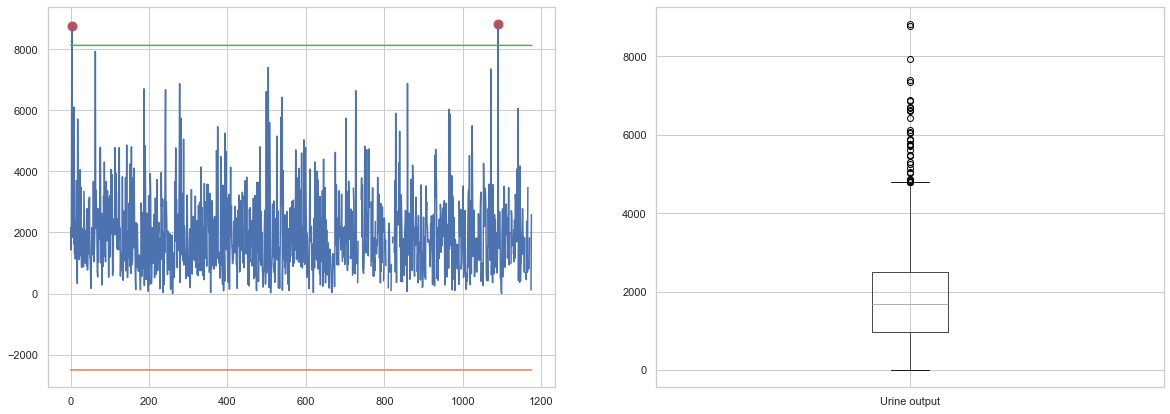

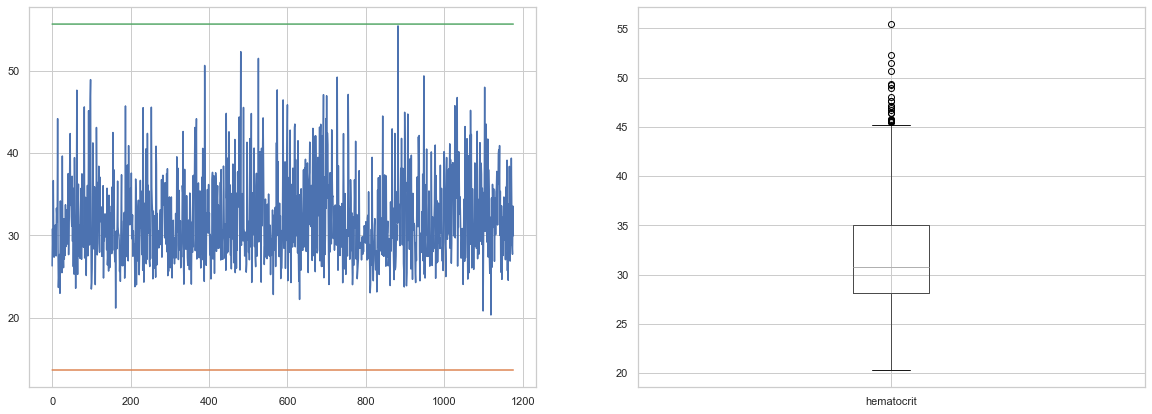

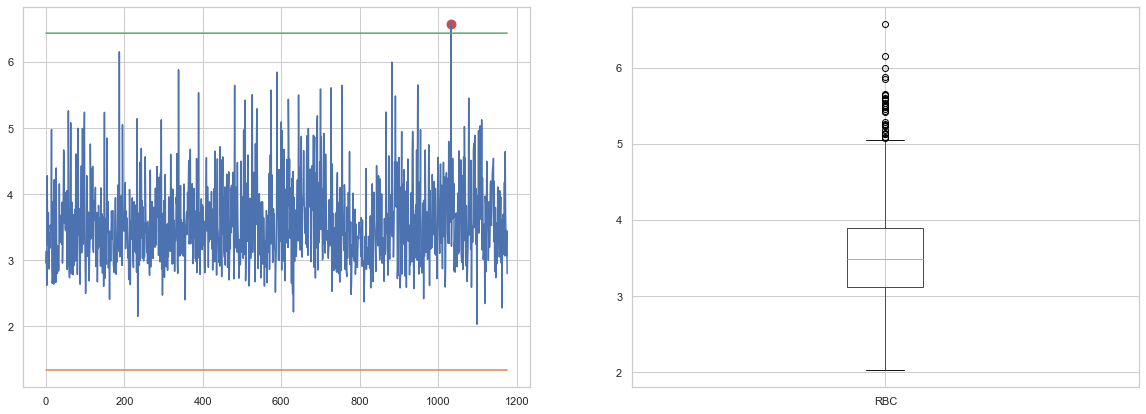

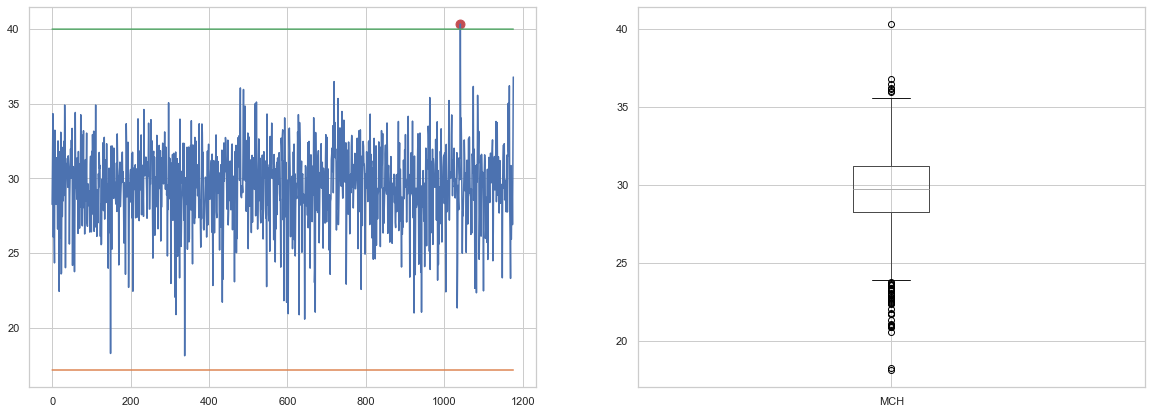

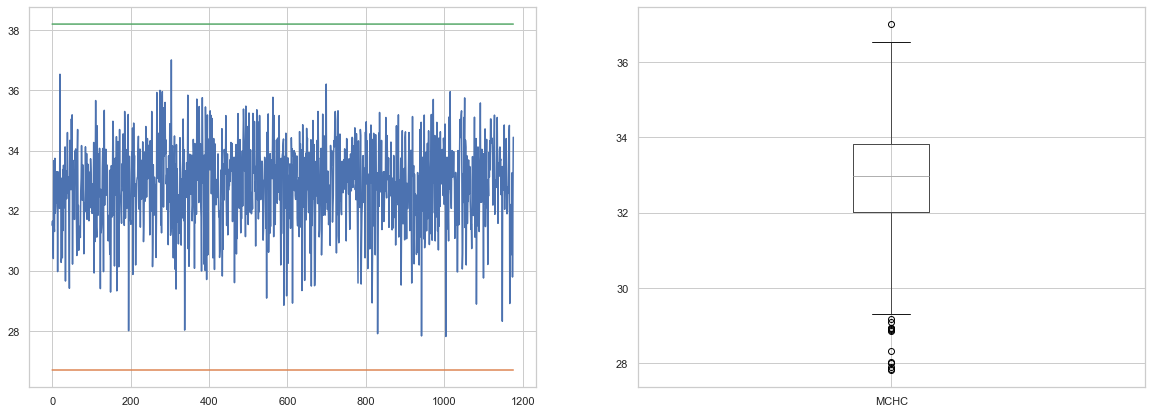

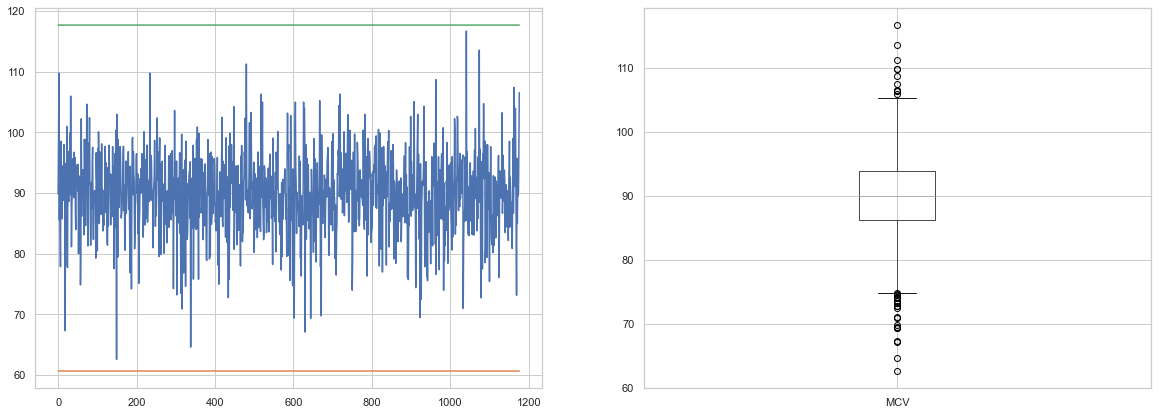

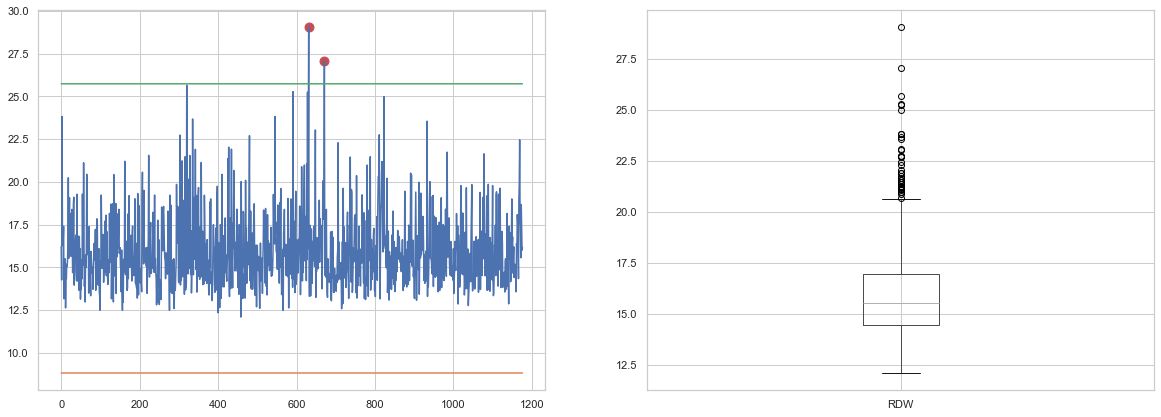

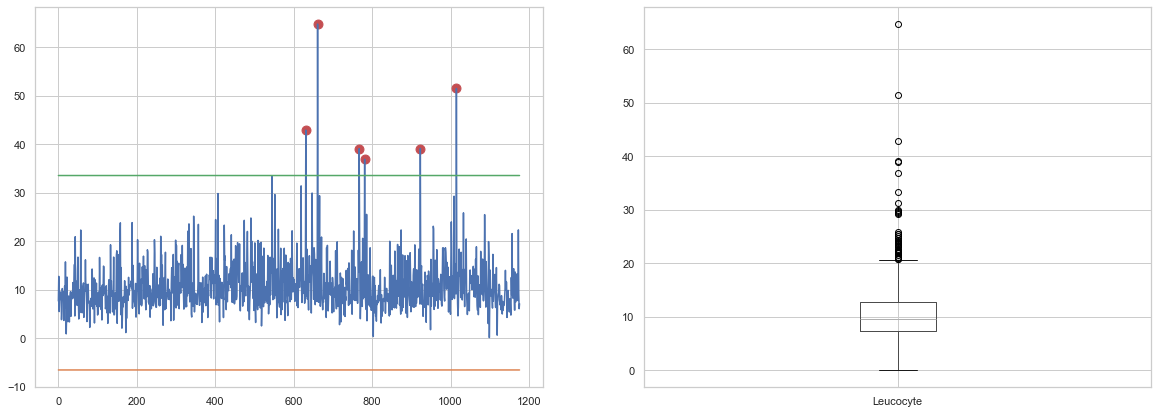

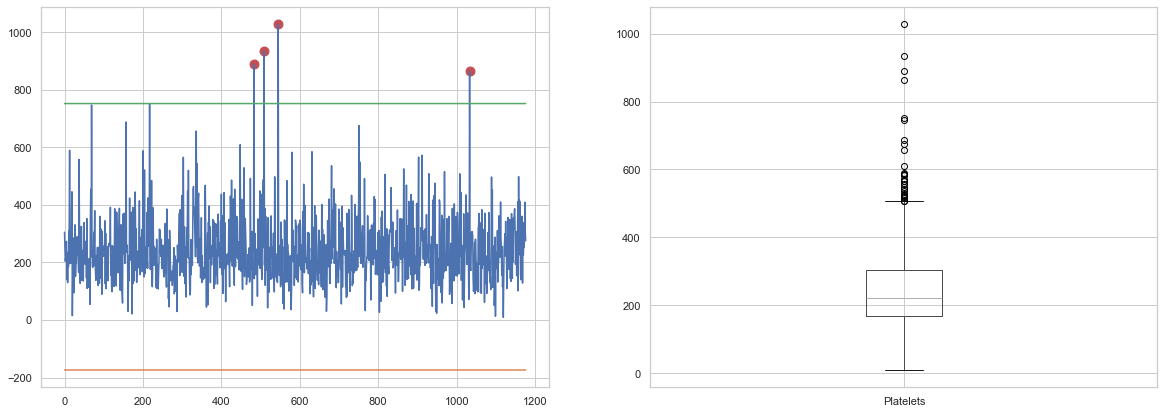

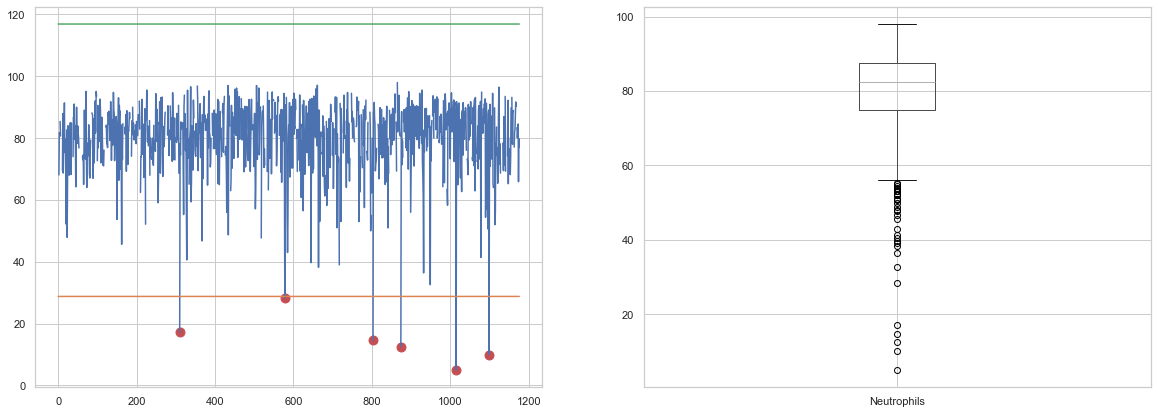

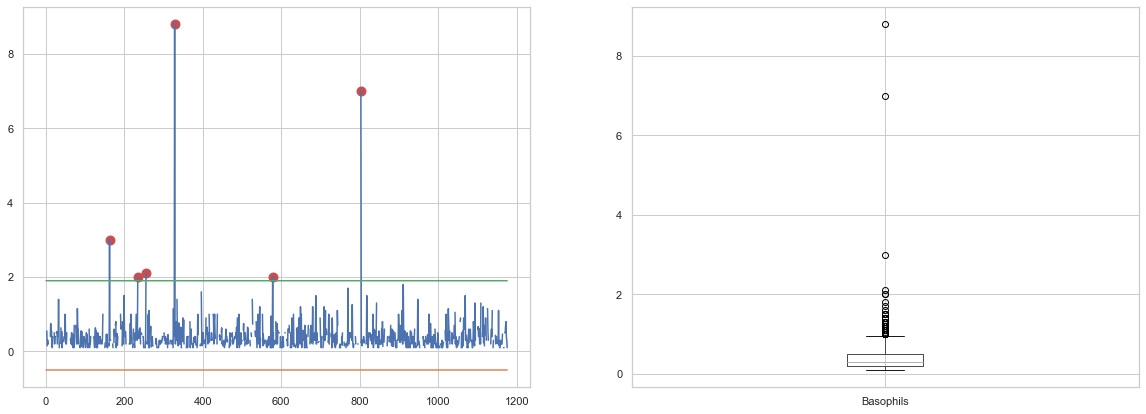

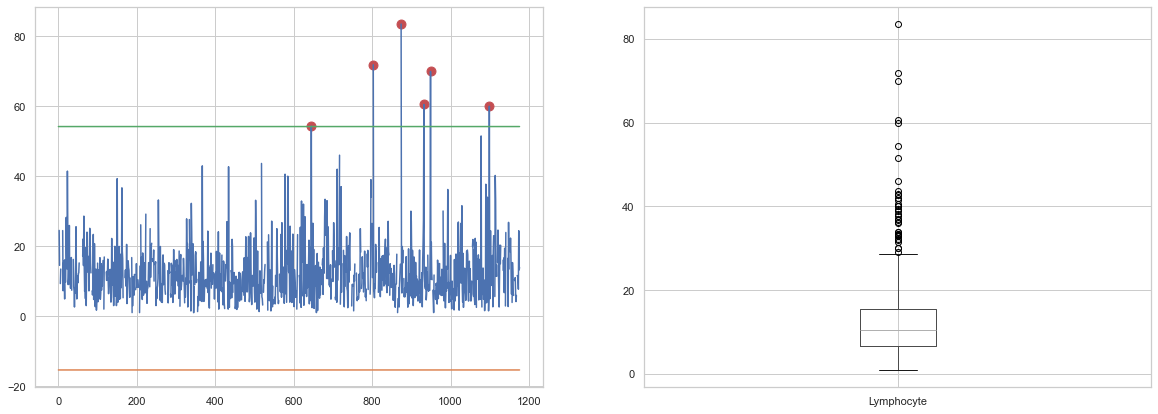

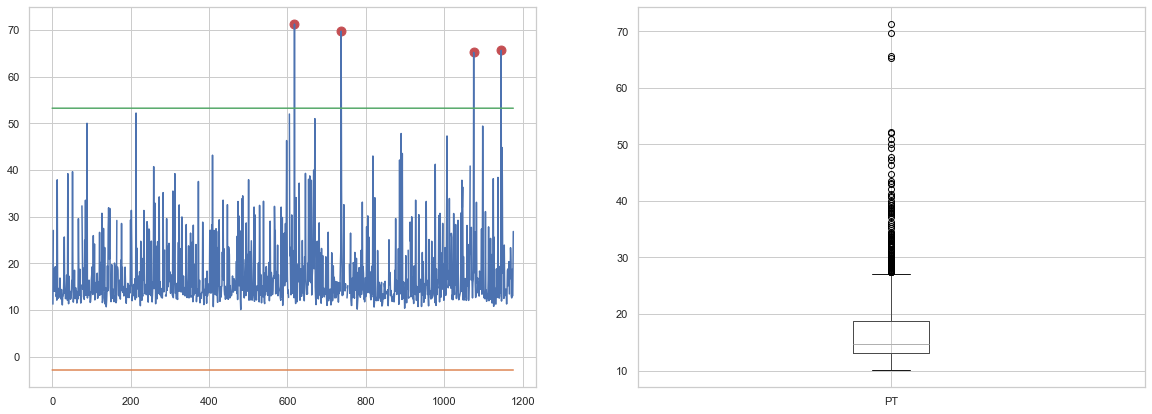

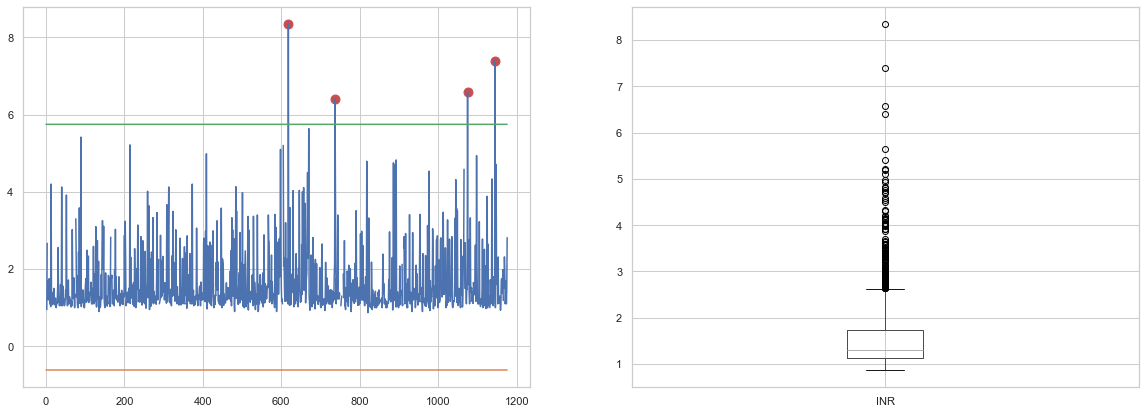

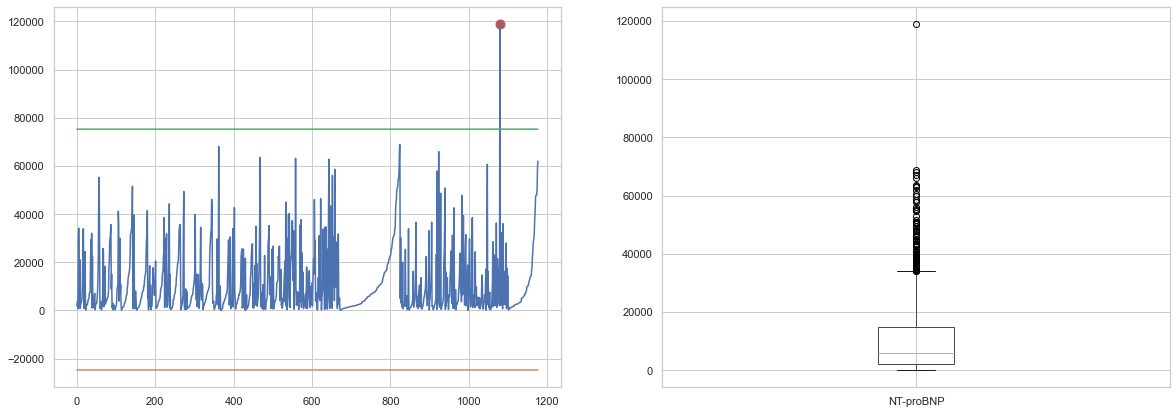

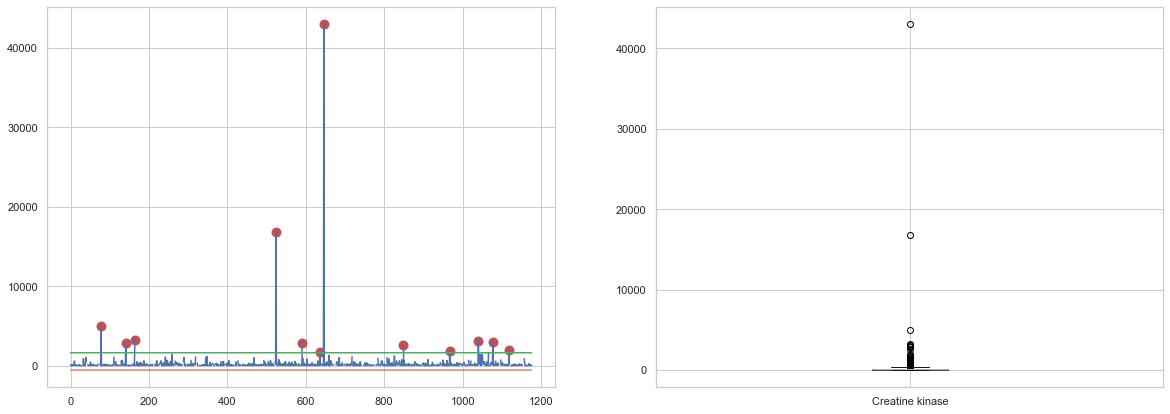

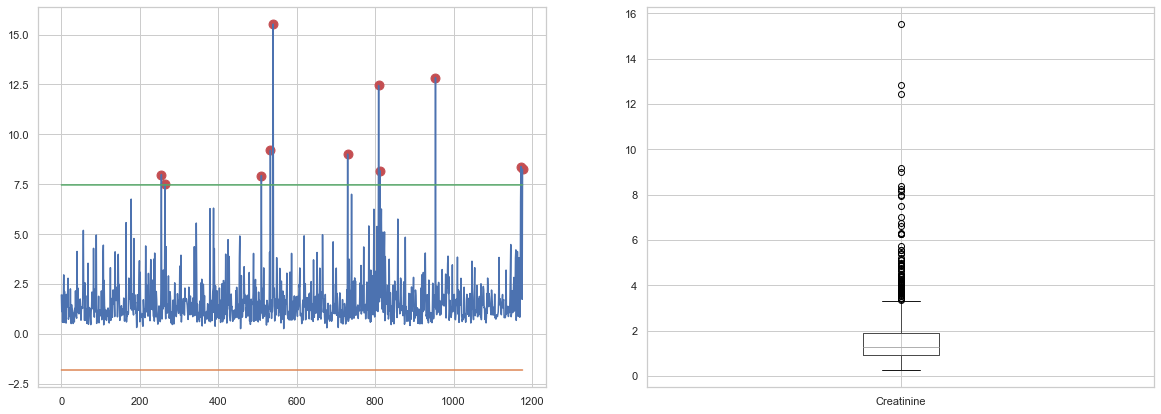

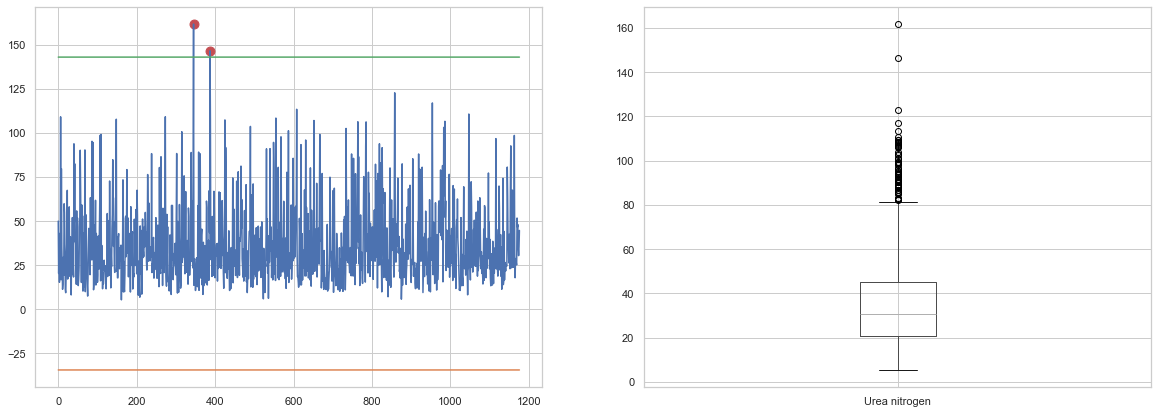

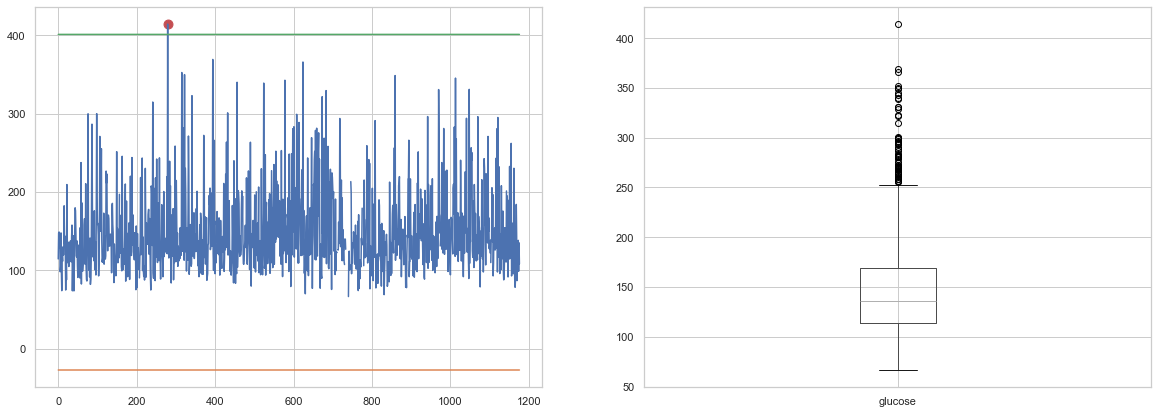

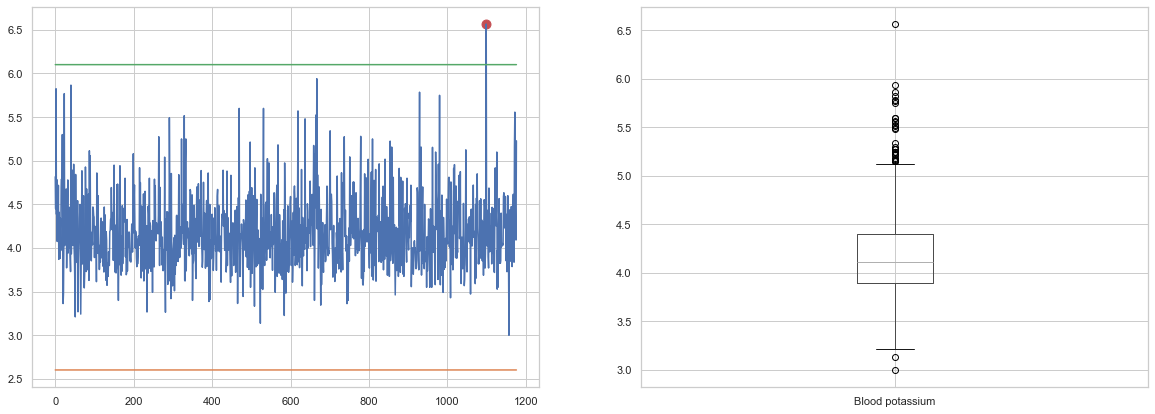

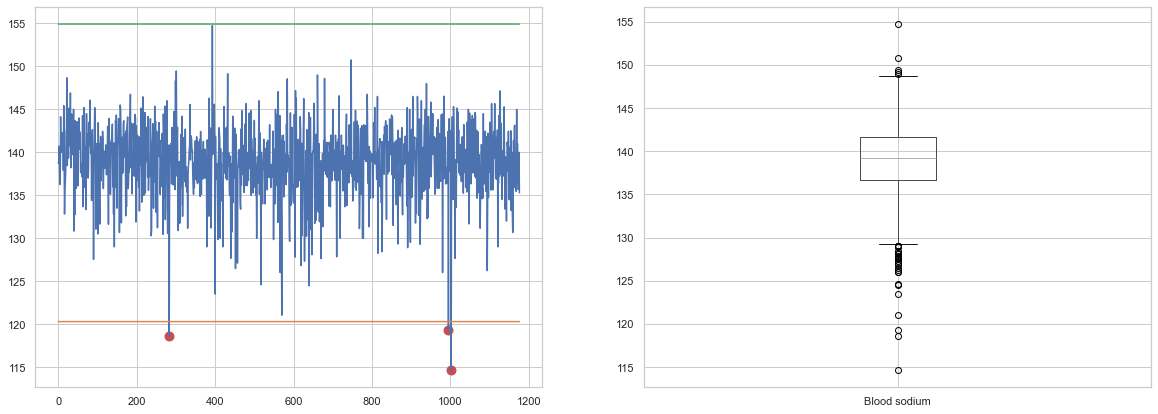

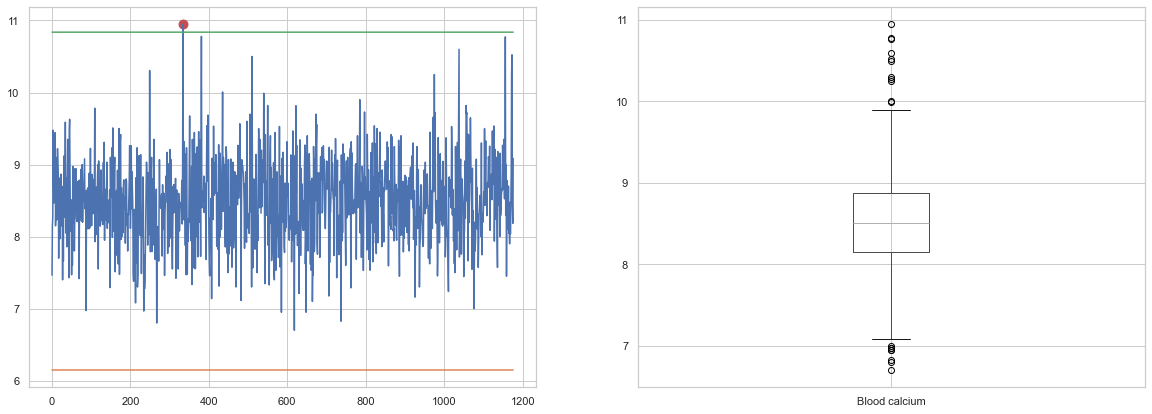

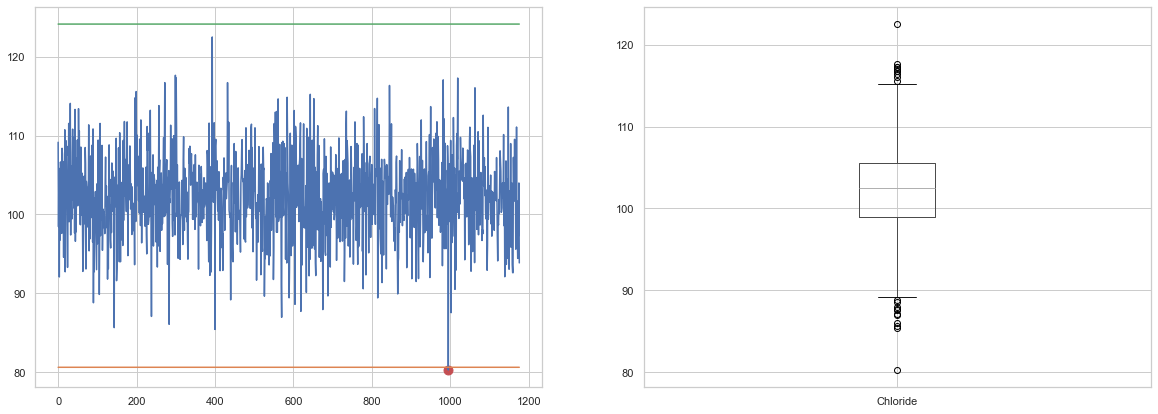

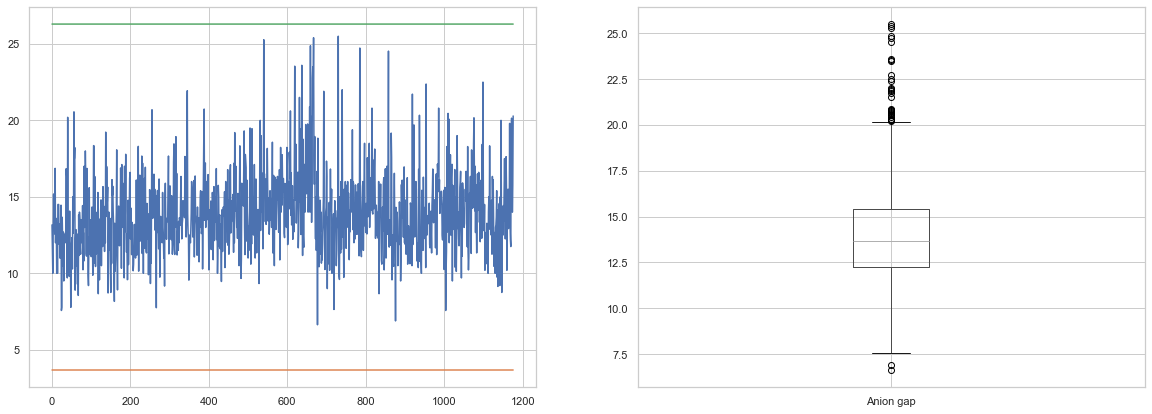

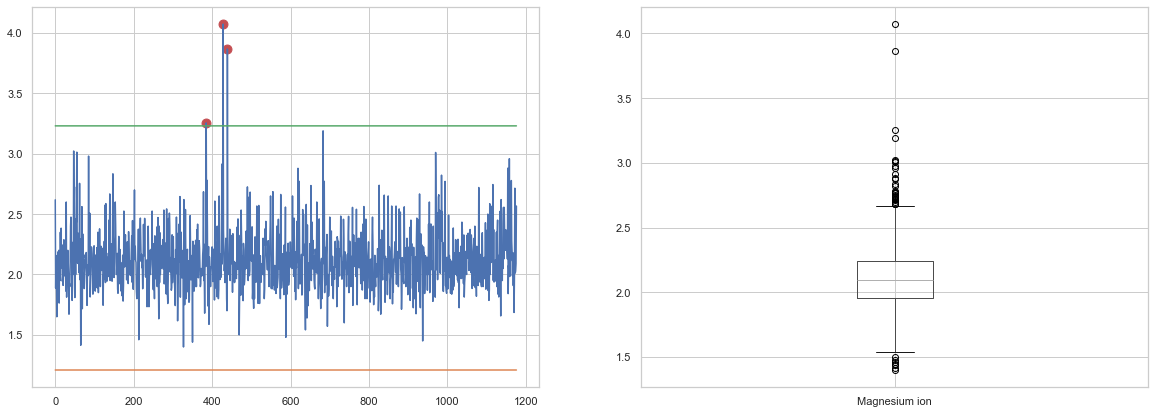

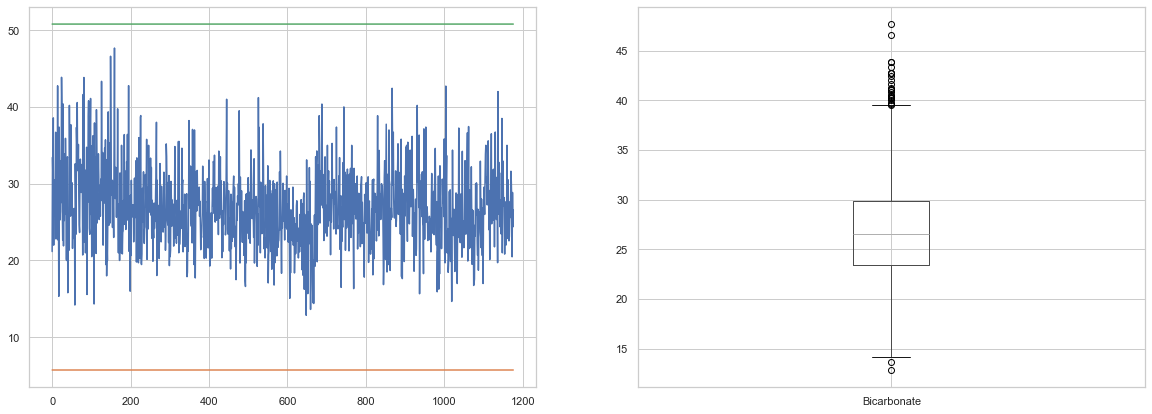

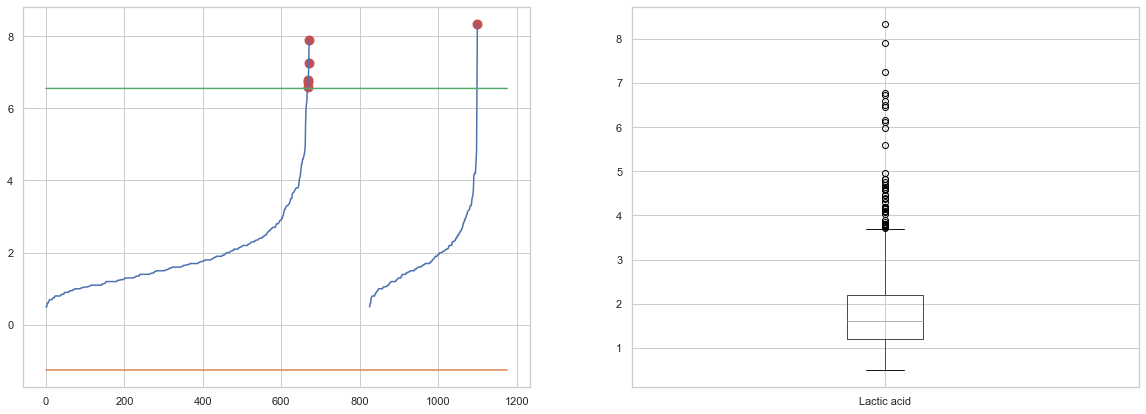

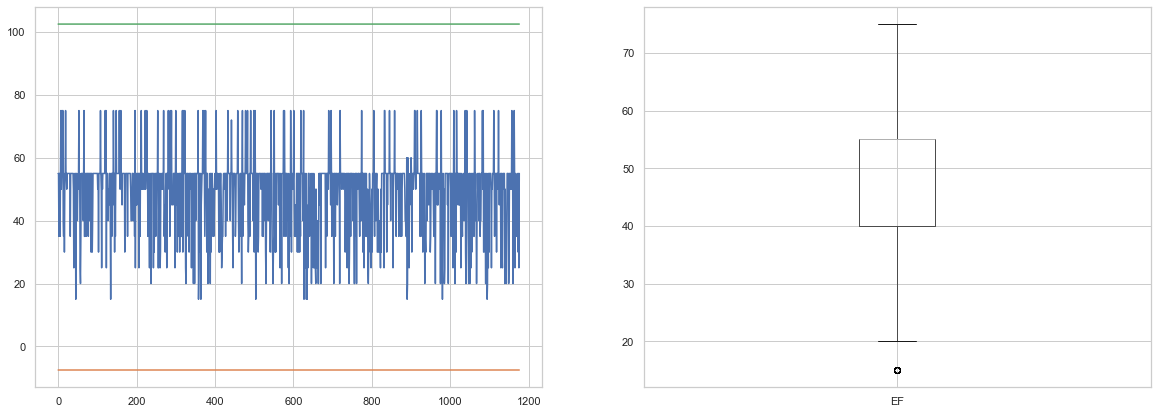

In [20]:

dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
tot_out_indices=[]
i=0
for key in dtypes:
  if(key in numAttr):
    fig = plt.figure(i,figsize=(20,7))
    ax = fig.add_subplot(1, 2, 1)
    i+=1


    ax.plot(df[key])
    q5, q95 = np.percentile(df[key].dropna(), 2), np.percentile(df[key].dropna(), 98)
    iqr = q95 - q5
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q95 - cut_off, q5 + cut_off
    ax.plot(lower*np.ones(1177))
    ax.plot(upper*np.ones(1177))
    outliers = [x for x in df[key] if (x < lower or x > upper) and (x!=None)]
    out_indices = [ind for ind in range(df.shape[0]) if df.loc[ind,key] < lower or df.loc[ind,key] > upper]
    ax.scatter(out_indices,outliers,color='r',s=80)
    tot_out_indices.extend(out_indices)
    outliers_removed = [x for x in df[key] if x > lower and x < upper]

    ax = fig.add_subplot(1, 2, 2)
    df.boxplot(key)

    print('Identified outliers in {}: {} {}'.format(key,len(outliers),outliers))
tot_out_indices = np.unique(tot_out_indices)
print(tot_out_indices)


In [21]:
df.drop(tot_out_indices, axis=0,inplace=True)

In [22]:
df

outcome  age  gendera        BMI  hypertensive  atrialfibrillation  \
1         0.0   75        2        NaN             0                   0   
2         0.0   83        2  26.572634             0                   0   
4         0.0   75        2  31.824842             1                   0   
5         0.0   76        1  24.262293             1                   1   
6         0.0   72        1  39.667426             1                   0   
...       ...  ...      ...        ...           ...                 ...   
1170      0.0   79        1  24.221453             1                   1   
1171      0.0   92        1  23.822169             1                   0   
1173      0.0   78        1  25.822710             0                   1   
1174      0.0   85        2  23.891779             1                   1   
1175      0.0   79        2  35.288554             0                   0   

      CHD with no MI  diabetes  deficiencyanemias  depression  ...  \
1                  0         0                  1           0  ...   
2                  0         0                  1           0  ...   
4                  0         0                  1           0  ...   
5                  0         0                  1           0  ...   
6                  0         0                  0           0  ...   
...              ...       ...                ...         ...  ...   
1170               0         0                  0           0  ...   
1171               0         0                  0           0  ...   
1173               0         1                  0           1  ...   
1174               0         1                  1           0  ...   
1175               1         1                  1           1  ...   

         glucose  Blood potassium  Blood sodium  Blood calcium    Chloride  \
1     147.500000         4.450000    138.888889       8.162500   98.444444   
2     149.000000         5.825000    140.714286       8.266667  105.857143   
4     145.750000         4.783333    136.666667       8.733333  104.500000   
5      98.333333         4.075000    136.250000       8.466667   96.750000   
6     105.600000         4.606667    144.133333       8.775000  106.666667   
...          ...              ...           ...            ...         ...   
1170   87.000000         3.837500    138.000000       8.366667   98.625000   
1171  108.500000         5.160000    141.000000       8.900000   96.800000   
1173  138.333333         4.520000    135.680000      10.523529  101.720000   
1174   99.000000         4.100000    136.000000       8.466667   97.285714   
1175  135.166667         4.091667    140.000000       8.183333  104.000000   

      Anion gap  Magnesium ion  Bicarbonate  Lactic acid  EF  
1     11.444444       1.887500    33.444444        0.500  55  
2     10.000000       2.157143    30.571429        0.500  35  
4     15.166667       1.650000    22.000000        0.600  55  
5     13.125000       1.771429    30.500000        0.600  35  
6     15.200000       1.875000    26.800000        0.625  55  
...         ...            ...          ...          ...  ..  
1170  11.750000       1.685714    31.625000          NaN  40  
1171  19.200000       1.980000    30.200000          NaN  55  
1173  18.160000       2.012500    20.480000          NaN  30  
1174  14.000000       2.028571    28.857143          NaN  55  
1175  15.750000       2.090000    24.375000          NaN  25  

[1098 rows x 47 columns]

### **Correlation Study**


In [23]:
uncorrelatedAtt={}
min_corr=0.26
for att in df.columns:
  uncorrelatedAtt[att]=True

max_corr=0.75
corratt={}

#### **Univariate Correlation between numerical-input numerical-output**



##### **Pearson method for linear relation**

In [24]:
a=np.abs(df[numAttr].corr())
print(a)

                               age       BMI  heart rate  \
age                       1.000000  0.370234    0.200576   
BMI                       0.370234  1.000000    0.026799   
heart rate                0.200576  0.026799    1.000000   
Systolic blood pressure   0.022635  0.115871    0.146374   
Diastolic blood pressure  0.335812  0.162202    0.324207   
Respiratory rate          0.022894  0.082432    0.354767   
temperature               0.205091  0.072324    0.165827   
SP O2                     0.062306  0.164191    0.089186   
Urine output              0.243565  0.259465    0.022922   
hematocrit                0.040898  0.129612    0.004299   
RBC                       0.075986  0.152439    0.013969   
MCH                       0.084796  0.110644    0.022849   
MCHC                      0.028674  0.113100    0.017424   
MCV                       0.085305  0.067164    0.018788   
RDW                       0.044229  0.063841    0.030319   
Leucocyte                 0.026386  0.08

In [25]:
a=np.abs(df[numAttr].corr())
corratt={}
imtnt_att={}

for att in numAttr:
  k = a.loc[att].sort_values(ascending=False)
  imtnt_att[att] = []
  if k[1]>min_corr:
    uncorrelatedAtt[att] = False
  for p,b in k.items():
    if b<1:
      imtnt_att[att].append((p,b))
      if( (p,att) not in corratt.keys() and b>max_corr):
        corratt[(att,p)] = b


print(imtnt_att)
print(corratt)
display(a)

{'age': [('BMI', 0.3702339052451902), ('Diastolic blood pressure', 0.3358120150196527), ('Urine output', 0.24356530839209825), ('temperature', 0.20509058087419438), ('heart rate', 0.20057579880881765), ('Chloride', 0.12193440905306616), ('Urea nitrogen', 0.11418648994174278), ('glucose', 0.11013728498572845), ('Lymphocyte', 0.10567340367208033), ('Creatine kinase', 0.10473071285774148), ('Blood sodium', 0.10433940459989008), ('Neutrophils', 0.09125007979651929), ('Basophils', 0.09084943491554962), ('NT-proBNP', 0.08919880147165264), ('Magnesium ion', 0.08832844243624319), ('MCV', 0.0853053538148455), ('MCH', 0.08479647636750422), ('INR', 0.08055164764136032), ('RBC', 0.07598567157368681), ('PT', 0.07482158272627475), ('SP O2', 0.06230584482726254), ('Bicarbonate', 0.055895107202596814), ('EF', 0.05261393826769066), ('RDW', 0.04422874775400801), ('hematocrit', 0.04089766818216958), ('MCHC', 0.028674127837985626), ('Platelets', 0.027122902250736727), ('Leucocyte', 0.026385512034874183), 

C:\Users\user\AppData\Local\Temp\ipykernel_17264\2309644642.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if k[1]>min_corr:


age       BMI  heart rate  \
age                       1.000000  0.370234    0.200576   
BMI                       0.370234  1.000000    0.026799   
heart rate                0.200576  0.026799    1.000000   
Systolic blood pressure   0.022635  0.115871    0.146374   
Diastolic blood pressure  0.335812  0.162202    0.324207   
Respiratory rate          0.022894  0.082432    0.354767   
temperature               0.205091  0.072324    0.165827   
SP O2                     0.062306  0.164191    0.089186   
Urine output              0.243565  0.259465    0.022922   
hematocrit                0.040898  0.129612    0.004299   
RBC                       0.075986  0.152439    0.013969   
MCH                       0.084796  0.110644    0.022849   
MCHC                      0.028674  0.113100    0.017424   
MCV                       0.085305  0.067164    0.018788   
RDW                       0.044229  0.063841    0.030319   
Leucocyte                 0.026386  0.086466    0.143370   
Platelets                 0.027123  0.067413    0.084799   
Neutrophils               0.091250  0.131720    0.066144   
Basophils                 0.090849  0.133052    0.014425   
Lymphocyte                0.105673  0.131645    0.103849   
PT                        0.074822  0.007416    0.035289   
INR                       0.080552  0.009074    0.034991   
NT-proBNP                 0.089199  0.191264    0.000801   
Creatine kinase           0.104731  0.024998    0.039276   
Creatinine                0.009423  0.028518    0.138719   
Urea nitrogen             0.114186  0.003296    0.155965   
glucose                   0.110137  0.127710    0.035636   
Blood potassium           0.017016  0.041225    0.042930   
Blood sodium              0.104339  0.051422    0.053365   
Blood calcium             0.011037  0.090865    0.127718   
Chloride                  0.121934  0.183166    0.049028   
Anion gap                 0.020840  0.118410    0.017739   
Magnesium ion             0.088328  0.030310    0.089654   
Bicarbonate               0.055895  0.274379    0.102776   
Lactic acid               0.021620  0.077469    0.171003   
EF                        0.052614  0.041953    0.068679   

                          Systolic blood pressure  Diastolic blood pressure  \
age                                      0.022635                  0.335812   
BMI                                      0.115871                  0.162202   
heart rate                               0.146374                  0.324207   
Systolic blood pressure                  1.000000                  0.360238   
Diastolic blood pressure                 0.360238                  1.000000   
Respiratory rate                         0.060996                  0.130313   
temperature                              0.090345                  0.011119   
SP O2                                    0.034130                  0.133143   
Urine output                             0.232972                  0.228542   
hematocrit                               0.015256                  0.331985   
RBC                                      0.025833                  0.321176   
MCH                                      0.014078                  0.032788   
MCHC                                     0.028451                  0.038325   
MCV                                      0.033960                  0.021046   
RDW                                      0.154359                  0.044510   
Leucocyte                                0.083328                  0.073067   
Platelets                                0.088853                  0.054969   
Neutrophils                              0.029868                  0.064307   
Basophils                                0.048816                  0.137491   
Lymphocyte                               0.076378                  0.119140   
PT                                       0.181844                  0.050408   
INR                                      0.166474                  0.054

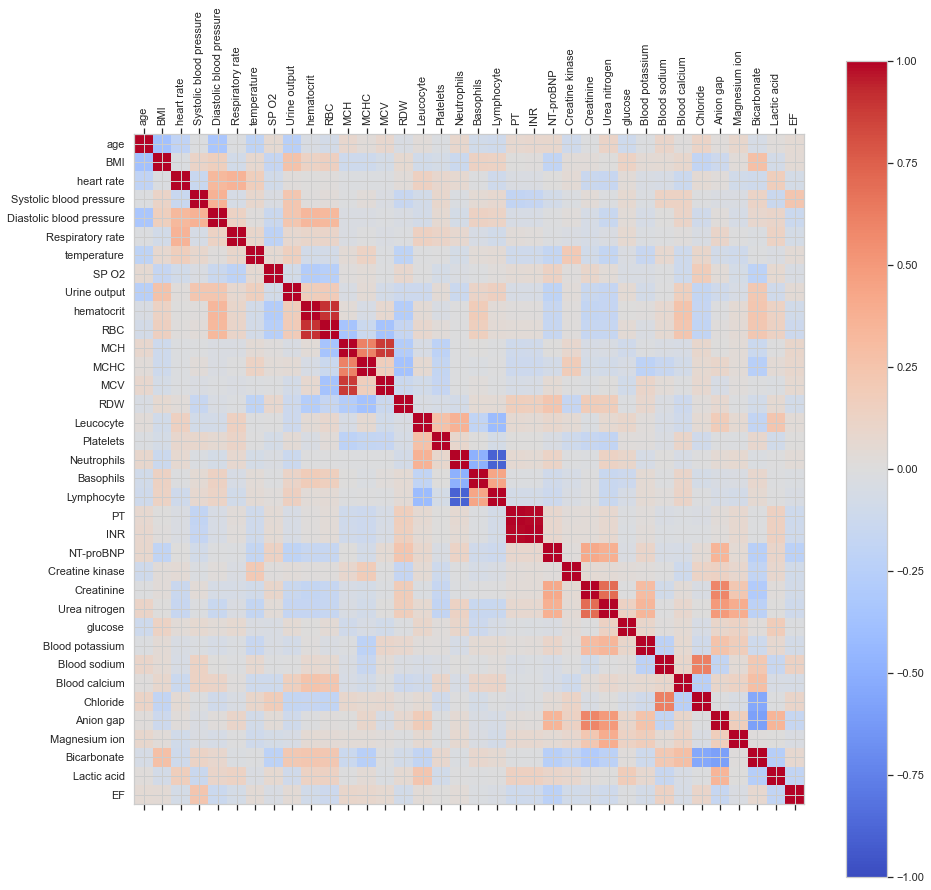

In [26]:

df_corr = df[numAttr]
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

##### **Spearman method for nonlinear relation**

In [27]:
a=np.abs(df[numAttr].corr(method='spearman'))

for att in numAttr:
  k= a.loc[att].sort_values(ascending=False)[1:6]
  if k[0]>min_corr:
    uncorrelatedAtt[att] = False
  k = k[k>max_corr]

  if not k.empty :
    for p,b in k.items():
      if( (p,att) not in corratt.keys()):
        corratt[(att,p)] = b
print(corratt)


{('hematocrit', 'RBC'): 0.8858373197210019, ('MCH', 'MCV'): 0.8469443851363359, ('Neutrophils', 'Lymphocyte'): 0.888330731377761, ('PT', 'INR'): 0.9859054879939444, ('Creatinine', 'Urea nitrogen'): 0.7635767293956509}


C:\Users\user\AppData\Local\Temp\ipykernel_17264\1366125341.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if k[0]>min_corr:


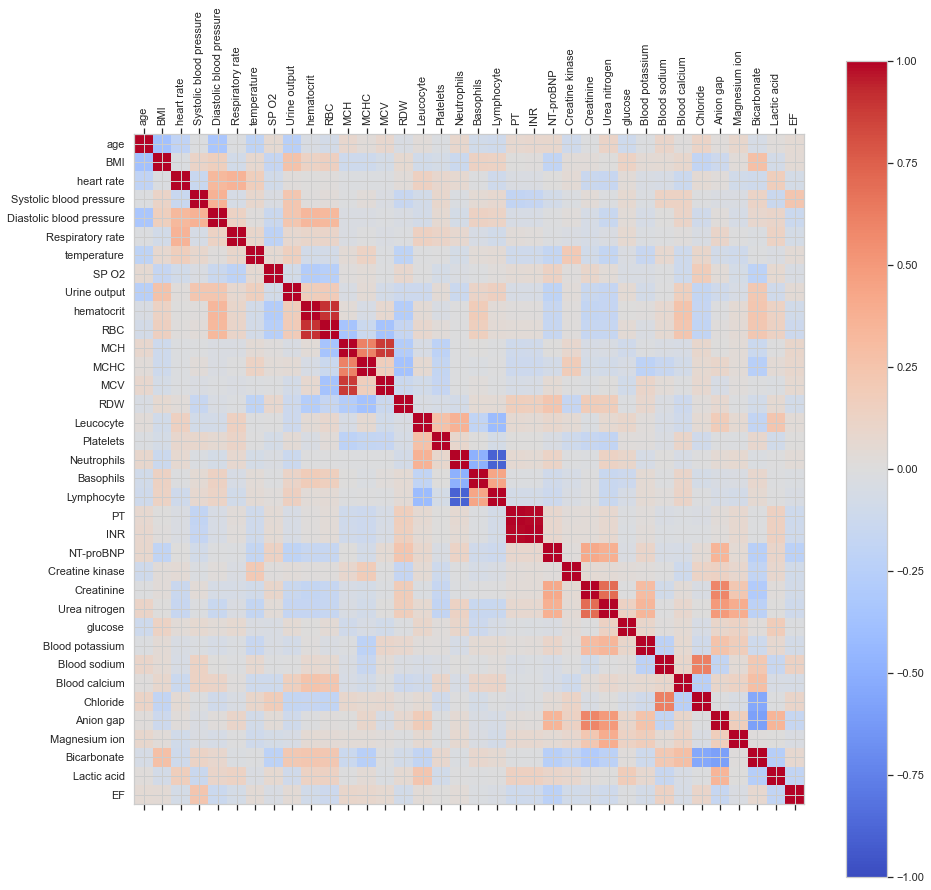

In [28]:
df_corr = df[numAttr]
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()


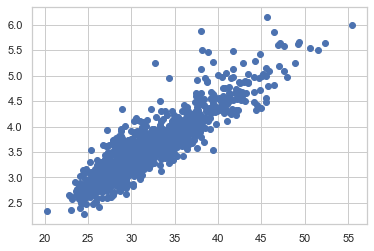

In [29]:
plt.scatter(df['hematocrit'],df['RBC'])

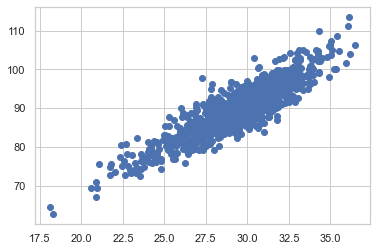

In [30]:
plt.scatter(df['MCH'],df['MCV'])

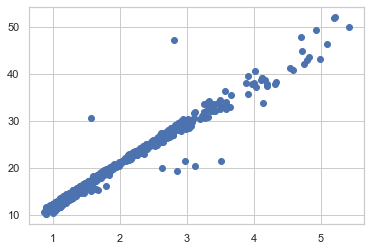

In [31]:
plt.scatter(df['INR'],df['PT'])

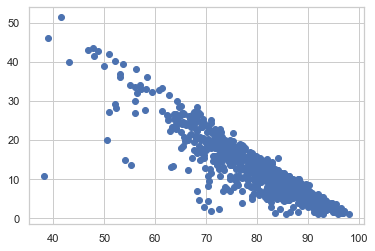

In [32]:
plt.scatter(df['Neutrophils'],df['Lymphocyte'])

#### **Univariate Correlation between categorical-input categorical-output**

In [33]:
a=np.abs(df[binaryAttr].corr())

for att in binaryAttr:
  k= a.loc[att].sort_values(ascending=False)[1:6]
  if k[0]>min_corr:
    uncorrelatedAtt[att] = False
  k = k[k>max_corr]
  if not k.empty :
    for p,b in k.items():
      if( (p,att) not in corratt.keys()):
        corratt[(att,p)] = b
print(corratt)
display(a)

{('hematocrit', 'RBC'): 0.8858373197210019, ('MCH', 'MCV'): 0.8469443851363359, ('Neutrophils', 'Lymphocyte'): 0.888330731377761, ('PT', 'INR'): 0.9859054879939444, ('Creatinine', 'Urea nitrogen'): 0.7635767293956509}


C:\Users\user\AppData\Local\Temp\ipykernel_17264\2542425387.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if k[0]>min_corr:


outcome   gendera  hypertensive  atrialfibrillation  \
outcome             1.000000  0.033910      0.053019            0.098290   
gendera             0.033910  1.000000      0.004402            0.046449   
hypertensive        0.053019  0.004402      1.000000            0.004347   
atrialfibrillation  0.098290  0.046449      0.004347            1.000000   
CHD with no MI      0.005777  0.083954      0.007392            0.019870   
diabetes            0.052876  0.041560      0.124647            0.014332   
deficiencyanemias   0.096229  0.097353      0.012399            0.097326   
depression          0.058435  0.092620      0.051299            0.067429   
Hyperlipemia        0.051610  0.041473      0.223781            0.034033   
Renal failure       0.088845  0.095255      0.193109            0.045274   
COPD                0.042614  0.063262      0.003132            0.042492   

                    CHD with no MI  diabetes  deficiencyanemias  depression  \
outcome                   0.005777  0.052876           0.096229    0.058435   
gendera                   0.083954  0.041560           0.097353    0.092620   
hypertensive              0.007392  0.124647           0.012399    0.051299   
atrialfibrillation        0.019870  0.014332           0.097326    0.067429   
CHD with no MI            1.000000  0.019549           0.049653    0.042815   
diabetes                  0.019549  1.000000           0.057117    0.004430   
deficiencyanemias         0.049653  0.057117           1.000000    0.068246   
depression                0.042815  0.004430           0.068246    1.000000   
Hyperlipemia              0.040137  0.134262           0.016444    0.044690   
Renal failure             0.028077  0.186677           0.137870    0.001808   
COPD                      0.006994  0.072814           0.031214    0.022108   

                    Hyperlipemia  Renal failure      COPD  
outcome                 0.051610       0.088845  0.042614  
gendera                 0.041473       0.095255  0.063262  
hypertensive            0.223781       0.193109  0.003132  
atrialfibrillation      0.034033       0.045274  0.042492  
CHD with no MI          0.040137       0.028077  0.006994  
diabetes                0.134262       0.186677  0.072814  
deficiencyanemias       0.016444       0.137870  0.031214  
depression              0.044690       0.001808  0.022108  
Hyperlipemia            1.000000       0.092598  0.013959  
Renal failure           0.092598       1.000000  0.078000  
COPD                    0.013959       0.078000  1.000000

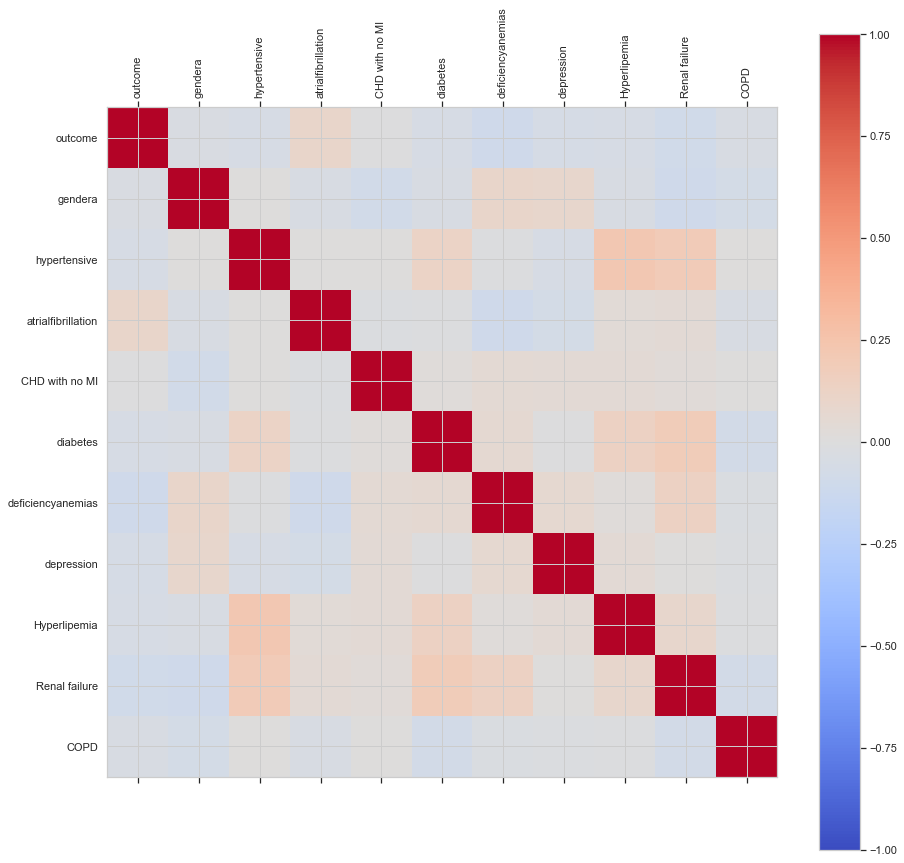

In [34]:
df_corr = df[binaryAttr]
corr = df_corr.corr()
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns)
ax.set_yticklabels(df_corr.columns)
plt.show()

#### **Univariate Correlation between numerical-input categorical-output**

In [35]:

corr = df.corr(method='kendall')
corr = np.abs(corr.loc[binaryAttr,numAttr])

dic={}
for att in numAttr:
  for batt in binaryAttr:
    k= corr.loc[batt,att]
    if k<min_corr and batt=='classification':
      dic[(batt,att)] = k
print(dic)

for att in numAttr:
  for batt in binaryAttr:
    k= corr.loc[batt,att]
    if k>max_corr:
      corratt[(batt,att)] = k
print(corratt)



{}
{('hematocrit', 'RBC'): 0.8858373197210019, ('MCH', 'MCV'): 0.8469443851363359, ('Neutrophils', 'Lymphocyte'): 0.888330731377761, ('PT', 'INR'): 0.9859054879939444, ('Creatinine', 'Urea nitrogen'): 0.7635767293956509}


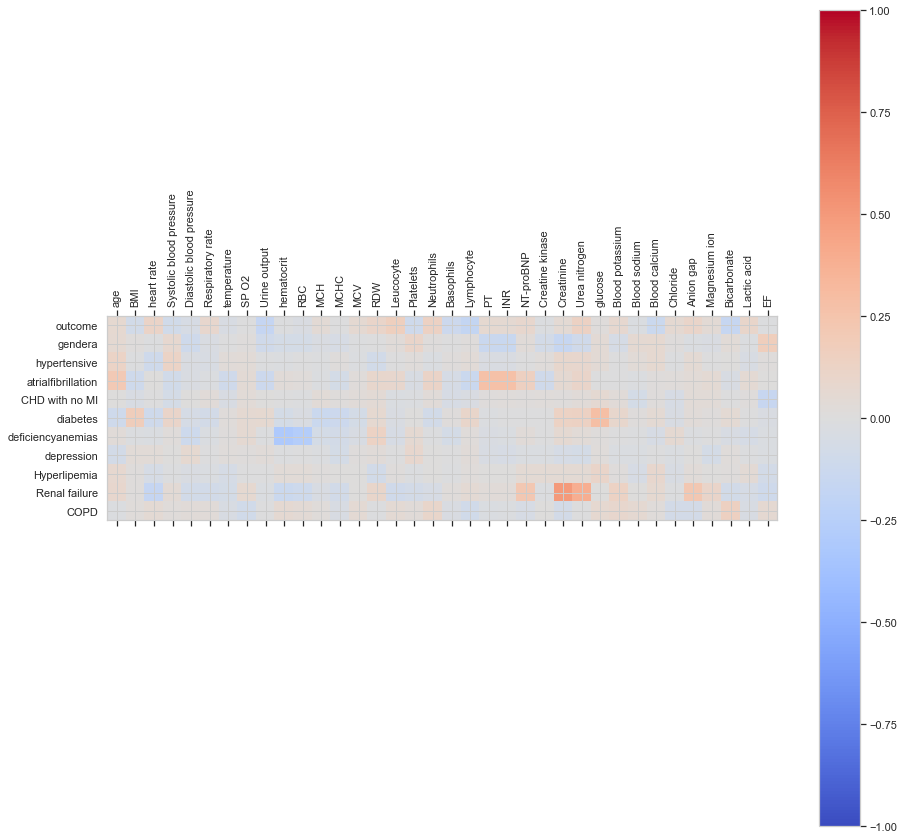

In [36]:
corr = df.corr(method='kendall')

corr = corr.loc[binaryAttr,numAttr]
fig = plt.figure( figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
xticks = np.arange(0,len(numAttr),1)
yticks = np.arange(0,len(binaryAttr),1)
ax.set_xticks(xticks)
plt.xticks(rotation=90)
ax.set_yticks(yticks)
ax.set_xticklabels(numAttr)
ax.set_yticklabels(binaryAttr)
plt.show()

In [37]:
corr

age       BMI  heart rate  Systolic blood pressure  \
outcome             0.065527 -0.079173    0.115146                -0.092086   
gendera             0.055254  0.011102   -0.011918                 0.070620   
hypertensive        0.118307 -0.009066   -0.101753                 0.120590   
atrialfibrillation  0.204272 -0.102653    0.004632                -0.089922   
CHD with no MI      0.004869 -0.039932   -0.003631                -0.064801   
diabetes           -0.107592  0.176517   -0.109074                 0.105012   
deficiencyanemias   0.028086 -0.017150   -0.029051                 0.016873   
depression         -0.071653  0.036130    0.033048                 0.004866   
Hyperlipemia        0.076861  0.011076   -0.060098                -0.015445   
Renal failure       0.080582  0.013667   -0.168136                 0.044607   
COPD               -0.015786  0.020131    0.048049                 0.021527   

                    Diastolic blood pressure  Respiratory rate  temperature  \
outcome                            -0.048011          0.084565    -0.044179   
gendera                            -0.106099         -0.032732    -0.005040   
hypertensive                       -0.032100         -0.046151     0.026976   
atrialfibrillation                 -0.039004         -0.020650    -0.098626   
CHD with no MI                      0.006002          0.023647    -0.039936   
diabetes                           -0.055851         -0.073090     0.019475   
deficiencyanemias                  -0.112861         -0.026893     0.014080   
depression                          0.064577         -0.000525     0.022649   
Hyperlipemia                       -0.035176         -0.023470    -0.059566   
Renal failure                      -0.083860         -0.079661    -0.063731   
COPD                                0.030900          0.028426    -0.040353   

                       SP O2  Urine output  hematocrit  ...   glucose  \
outcome            -0.001529     -0.170245   -0.011687  ...  0.011944   
gendera             0.008554     -0.100098   -0.065504  ...  0.039384   
hypertensive        0.031713     -0.008106   -0.018102  ...  0.044696   
atrialfibrillation  0.045723     -0.124994    0.027126  ... -0.007462   
CHD with no MI      0.038234      0.007788   -0.001237  ...  0.057525   
diabetes            0.057408      0.068106   -0.062863  ...  0.282623   
deficiencyanemias   0.059232     -0.013133   -0.309203  ...  0.007990   
depression          0.008995      0.024916   -0.008117  ...  0.020721   
Hyperlipemia       -0.004056     -0.001658    0.038443  ...  0.102840   
Renal failure       0.064350     -0.030041   -0.128456  ...  0.007373   
COPD               -0.092808     -0.002591    0.055624  ...  0.063868   

                    Blood potassium  Blood sodium  Blood calcium  Chloride  \
outcome                    0.077169     -0.027983      -0.128917  0.057972   
gendera                   -0.060075      0.057029       0.066179  0.011082   
hypertensive              -0.003517      0.034803       0.063435 -0.014634   
atrialfibrillation        -0.001109     -0.018281       0.009414  0.022933   
CHD with no MI             0.029560     -0.064665       0.013701 -0.048793   
diabetes                   0.091722      0.012801       0.052935 -0.044592   
deficiencyanemias         -0.000825     -0.011612      -0.050963  0.061466   
depression                -0.030954     -0.027193      -0.002287 -0.027215   
Hyperlipemia               0.013925     -0.047221       0.081730 -0.042628   
Renal failure              0.127454      0.003117       0.069380 -0.012413   
COPD                       0.082097      0.055603       0.019644 -0.071313   

                    Anion gap  Magnesium ion  Bicarbonate  Lactic acid  \
outcome              0.105912       0.045487    -0.163409     0.099599   
gendera             -0.029425      -0.034411     0.035550    -0.021761   
hypertensive         0.047115      -0.004860     0.002049    -0.043560   
atrialfibrillatio

In [38]:
uncorrelatedAttr = pd.DataFrame.from_dict(uncorrelatedAtt,orient='index').drop('outcome')
uncorrelatedAt = uncorrelatedAttr[uncorrelatedAttr[0]==True].index
for att in uncorrelatedAt:
  if att in binaryAttr:
    if corr.loc[att].sort_values(ascending=False)[0] > min_corr:
      uncorrelatedAt.drop(att)
  else:
    if np.abs(corr[att].sort_values(ascending=False)[0]) > min_corr:
      uncorrelatedAt.drop(att)
uncorrelatedAt

C:\Users\user\AppData\Local\Temp\ipykernel_17264\2410418871.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if corr.loc[att].sort_values(ascending=False)[0] > min_corr:
C:\Users\user\AppData\Local\Temp\ipykernel_17264\2410418871.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if corr.loc[att].sort_values(ascending=False)[0] > min_corr:
C:\Users\user\AppData\Local\Temp\ipykernel_17264\2410418871.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

Index(['gendera', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia',
       'Renal failure', 'COPD', 'temperature', 'Urine output', 'glucose'],
      dtype='object')

### **Feature Extraction**

We have studied in the section above the correlation between attributes. Using correlaion we can reduce nombre of variables by:

- remove the atrributes havn't any correlation with others
- leave one of correlated attributes that have a high correlation and remove others

#### **Uncorrelated attribute**

In [39]:
print(uncorrelatedAt)
df.drop(uncorrelatedAt,axis=1,inplace=True)

for att in uncorrelatedAt:
  if att in numAttr:
    numAttr.remove(att)
  elif att in binaryAttr:
    binaryAttr.remove(att)


Index(['gendera', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia',
       'Renal failure', 'COPD', 'temperature', 'Urine output', 'glucose'],
      dtype='object')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 1 to 1175
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1097 non-null   float64
 1   age                       1098 non-null   int64  
 2   BMI                       888 non-null    float64
 3   heart rate                1086 non-null   float64
 4   Systolic blood pressure   1083 non-null   float64
 5   Diastolic blood pressure  1083 non-null   float64
 6   Respiratory rate          1086 non-null   float64
 7   SP O2                     1086 non-null   float64
 8   hematocrit                1098 non-null   float64
 9   RBC                       1098 non-null   float64
 10  MCH                       1098 non-null   float64
 11  MCHC                      1098 non-null   float64
 12  MCV                       1098 non-null   float64
 13  RDW                       1098 non-null   float64
 14  Leucocyte    

#### **Correlated attributes**

In [41]:
print(corratt)

{('hematocrit', 'RBC'): 0.8858373197210019, ('MCH', 'MCV'): 0.8469443851363359, ('Neutrophils', 'Lymphocyte'): 0.888330731377761, ('PT', 'INR'): 0.9859054879939444, ('Creatinine', 'Urea nitrogen'): 0.7635767293956509}


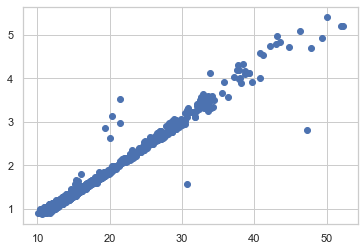

In [42]:
plt.scatter(df['PT'],df['INR'])

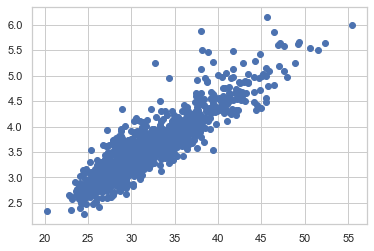

In [43]:
plt.scatter(df['hematocrit'],df['RBC'])

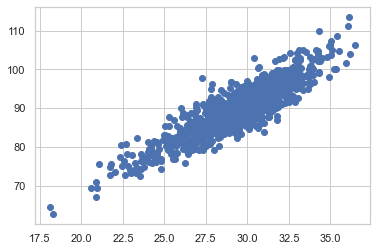

In [44]:
plt.scatter(df['MCH'],df['MCV'])

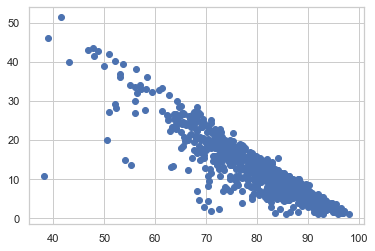

In [45]:
plt.scatter(df['Neutrophils'],df['Lymphocyte'])

Using pearson correlation we can see that we have a linear relation between:
- PT and INR
- hematocrit and RBC
- MCH and MCV
- Neutrophils and Lymphocyte

Thus we can this relation to get the missing values.

In [46]:
p1_1 = df[['PT','INR']].loc[df['PT'].isnull()].dropna(subset=['INR'], how='all') # missing values in PT can be prredicted using values of INR
p1_2 = df[['PT','INR']].loc[df['INR'].isnull()].dropna(subset=['PT'], how='all') # missing values in INR can be prredicted using values of PT
p2_1 = df[['hematocrit','RBC']].loc[df['hematocrit'].isnull()].dropna(subset=['RBC'], how='all') # missing values in hematocrit can be prredicted using values of RBC
p2_2 = df[['hematocrit','RBC']].loc[df['RBC'].isnull()].dropna(subset=['hematocrit'], how='all') # missing values in RBC can be prredicted using values of hematocrit
p3_1 = df[['MCH','MCV']].loc[df['MCH'].isnull()].dropna(subset=['MCV'], how='all') # missing values in MCH can be prredicted using values of MCV
p3_2 = df[['MCH','MCV']].loc[df['MCV'].isnull()].dropna(subset=['MCH'], how='all') # missing values in MCV can be prredicted using values of MCH
p4_1 = df[['Neutrophils','Lymphocyte']].loc[df['Neutrophils'].isnull()].dropna(subset=['Lymphocyte'], how='all') # missing values in Neutrophils can be prredicted using values of Lymphocyte
p4_2 = df[['Neutrophils','Lymphocyte']].loc[df['Lymphocyte'].isnull()].dropna(subset=['Neutrophils'], how='all') # missing values in Lymphocyte can be prredicted using values of Neutrophils


print("we can predict {} from {} of missing values in PT if we know INR and it remains {} missing values".format(p1_1.shape[0],df.isnull().sum()['PT'],df.isnull().sum()['PT']-p1_1.shape[0]))
print("we can predict {} from {} of missing values in INR if we know PT and it remains {} missing values".format(p1_2.shape[0],df.isnull().sum()['INR'],df.isnull().sum()['INR']-p1_2.shape[0]))
print("we can predict {} from {} of missing values in hematocrit if we know RBC and it remains {} missing values".format(p2_1.shape[0],df.isnull().sum()['hematocrit'],df.isnull().sum()['hematocrit']-p2_1.shape[0]))
print("we can predict {} from {} of missing values in RBC if we know hematocrit and it remains {} missing values".format(p2_2.shape[0],df.isnull().sum()['RBC'],df.isnull().sum()['RBC']-p2_2.shape[0]))
print("we can predict {} from {} of missing values in MCH if we know MCV and it remains {} missing values".format(p3_1.shape[0],df.isnull().sum()['MCH'],df.isnull().sum()['MCH']-p3_1.shape[0]))
print("we can predict {} from {} of missing values in MCV if we know MCH and it remains {} missing values".format(p3_2.shape[0],df.isnull().sum()['MCV'],df.isnull().sum()['MCV']-p3_2.shape[0]))
print("we can predict {} from {} of missing values in Neutrophils if we know Lymphocyte and it remains {} missing values".format(p4_1.shape[0],df.isnull().sum()['Neutrophils'],df.isnull().sum()['Neutrophils']-p4_1.shape[0]))
print("we can predict {} from {} of missing values in Lymphocyte if we know Neutrophils and it remains {} missing values".format(p4_2.shape[0],df.isnull().sum()['Lymphocyte'],df.isnull().sum()['Lymphocyte']-p4_2.shape[0]))

we can predict 0 from 20 of missing values in PT if we know INR and it remains 20 missing values
we can predict 0 from 20 of missing values in INR if we know PT and it remains 20 missing values
we can predict 0 from 0 of missing values in hematocrit if we know RBC and it remains 0 missing values
we can predict 0 from 0 of missing values in RBC if we know hematocrit and it remains 0 missing values
we can predict 0 from 0 of missing values in MCH if we know MCV and it remains 0 missing values
we can predict 0 from 0 of missing values in MCV if we know MCH and it remains 0 missing values
we can predict 0 from 138 of missing values in Neutrophils if we know Lymphocyte and it remains 138 missing values
we can predict 1 from 139 of missing values in Lymphocyte if we know Neutrophils and it remains 138 missing values


### **Missing values**


#### Representing missing values

In [47]:
print(df.isnull().sum())

df.info()

outcome                       1
age                           0
BMI                         210
heart rate                   12
Systolic blood pressure      15
Diastolic blood pressure     15
Respiratory rate             12
SP O2                        12
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 138
Basophils                   239
Lymphocyte                  139
PT                           20
INR                          20
NT-proBNP                     0
Creatine kinase             158
Creatinine                    0
Urea nitrogen                 0
Blood potassium               0
Blood sodium                  0
Blood calcium                 1
Chloride                      0
Anion gap                     0
Magnesium ion                 0
Bicarbon

<Axes: >

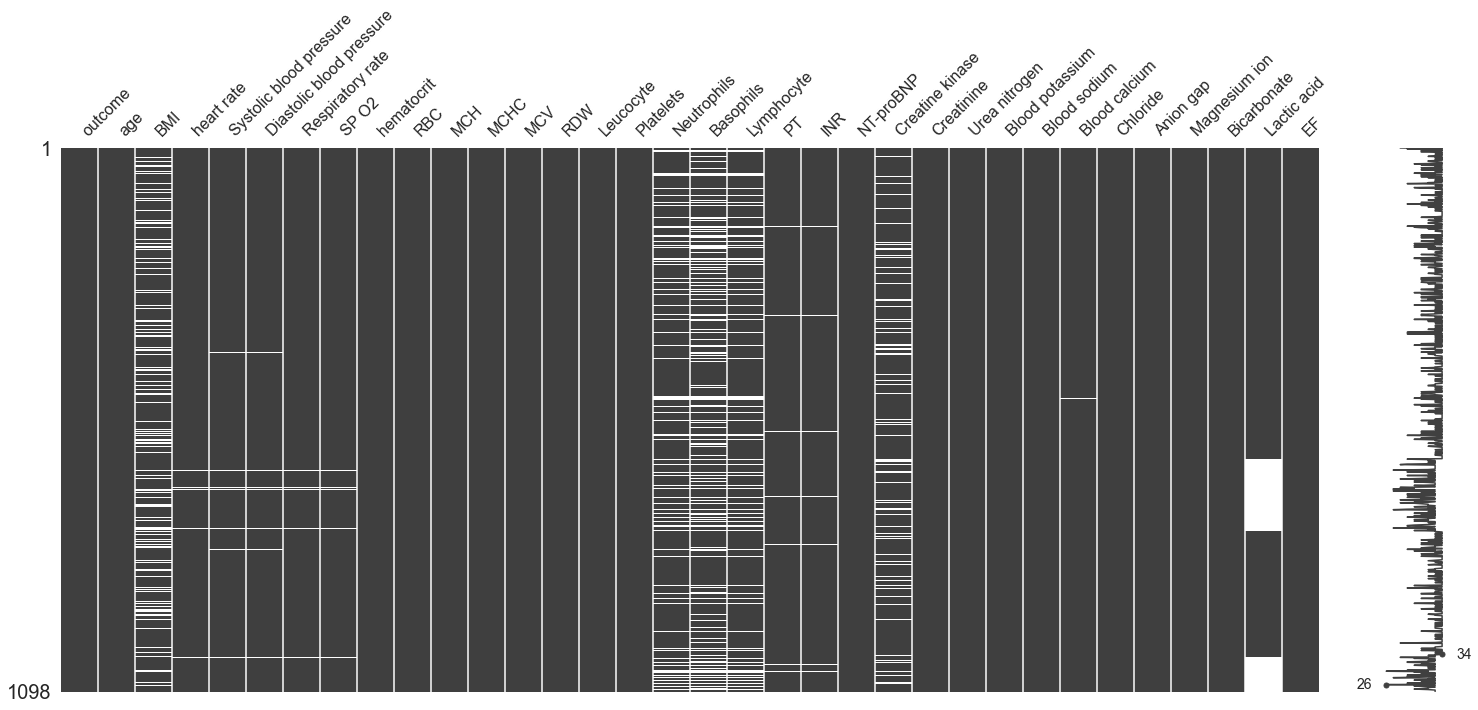

In [48]:
msno.matrix(df)

<Axes: >

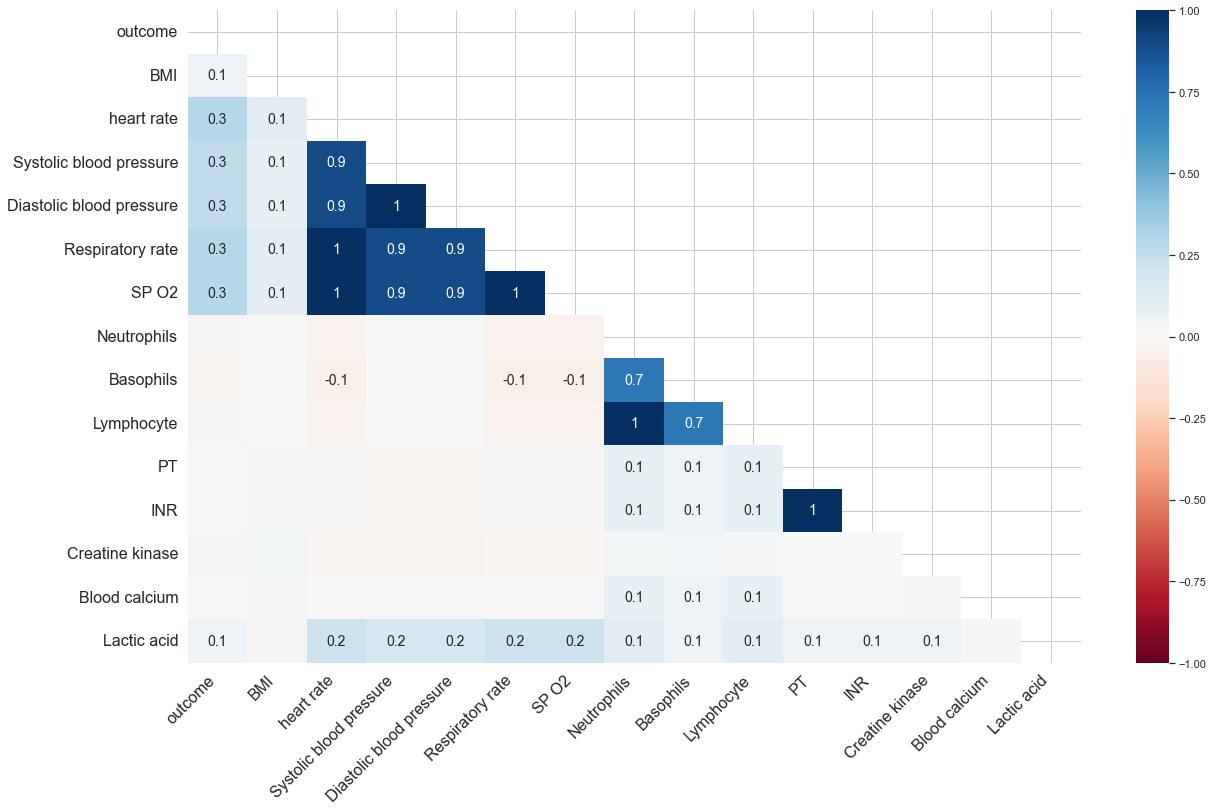

In [49]:
msno.heatmap(df)

<Axes: >

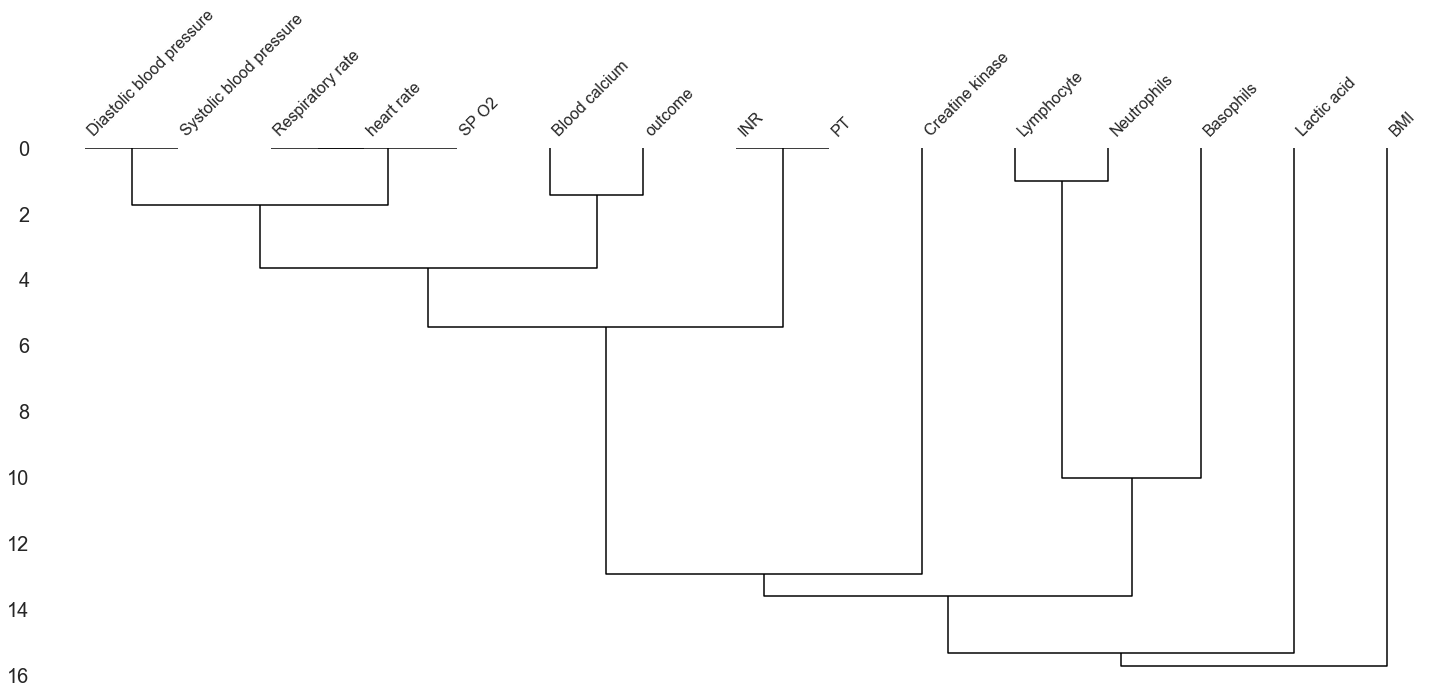

In [50]:
msno.dendrogram(df.loc[:, df.isna().any()])

#### Applying different methods to handle missing values problem

##### 1. Delete Rows with Missing Values:

In [51]:
df_DM = df.dropna()
df_DM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 2 to 1094
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   489 non-null    float64
 1   age                       489 non-null    int64  
 2   BMI                       489 non-null    float64
 3   heart rate                489 non-null    float64
 4   Systolic blood pressure   489 non-null    float64
 5   Diastolic blood pressure  489 non-null    float64
 6   Respiratory rate          489 non-null    float64
 7   SP O2                     489 non-null    float64
 8   hematocrit                489 non-null    float64
 9   RBC                       489 non-null    float64
 10  MCH                       489 non-null    float64
 11  MCHC                      489 non-null    float64
 12  MCV                       489 non-null    float64
 13  RDW                       489 non-null    float64
 14  Leucocyte     

<Axes: >

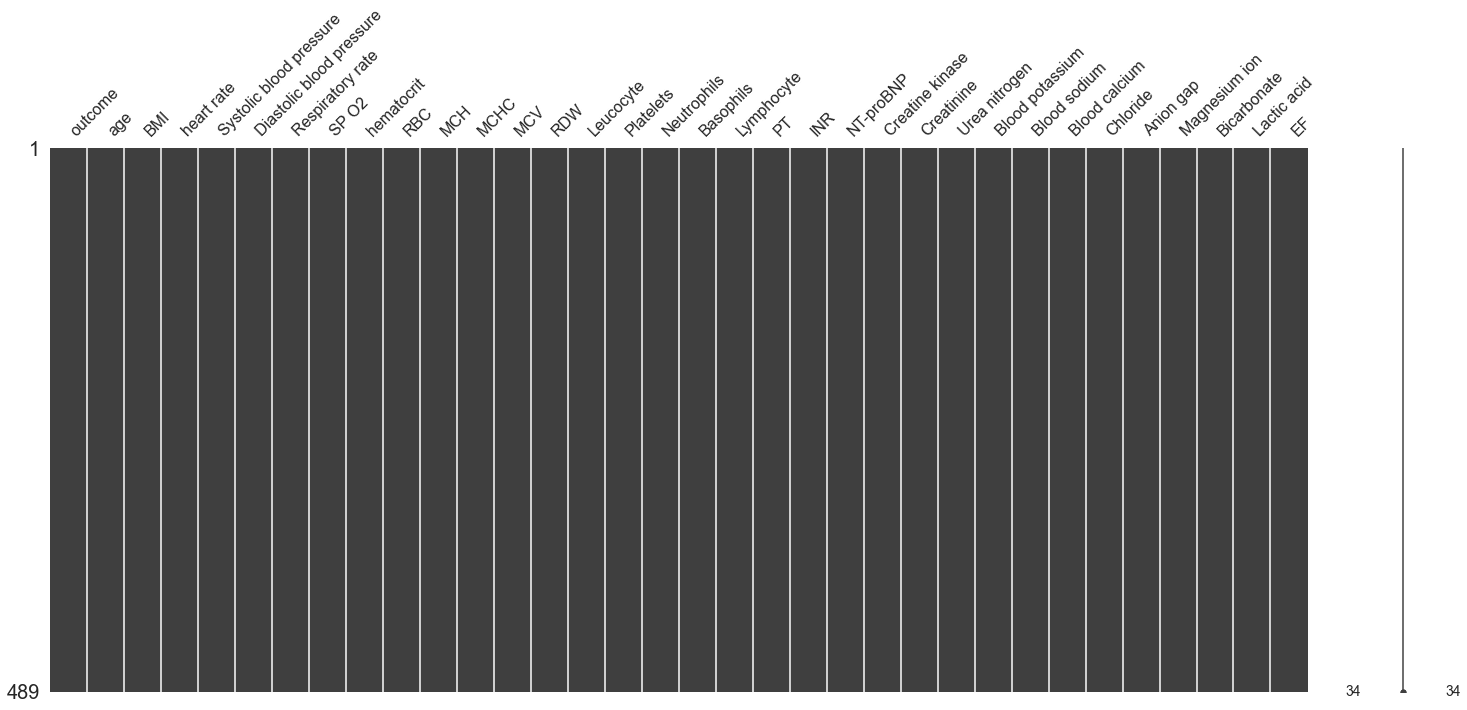

In [52]:
msno.matrix(df_DM)

**Using this method the data becomes much smaller with 158 rows, so it's better to use another approach to handle our concern.**

##### 2. Impute missing values with Mean/Median/Mode (Numerical and categorical values):
Using this method could efficient when number of missing values is small, but having a large number could affect our prediction; hence we will impute missing values with mean/median/mode when the number is less than 10.

In [53]:
threshold=0.05
dtypes = df.dtypes.apply(lambda x: x.name).to_dict()
objAttr=[]
binaryObjects=[]
naryObjects=[]
for key in dtypes:
  if(key in numAttr and df.isnull().sum()[key] < threshold*df.shape[0]):
    df[key] = df[key].replace(np.NaN,  df[key].mean())  # fill missing values with the mean or median
  elif(key in binaryAttr and df.isnull().sum()[key] < threshold*df.shape[0]):
    df[key] = df[key].fillna(df[key].mode()[0])  # fill categorical missing values with the most frequent category
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 1 to 1175
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1098 non-null   float64
 1   age                       1098 non-null   int64  
 2   BMI                       888 non-null    float64
 3   heart rate                1098 non-null   float64
 4   Systolic blood pressure   1098 non-null   float64
 5   Diastolic blood pressure  1098 non-null   float64
 6   Respiratory rate          1098 non-null   float64
 7   SP O2                     1098 non-null   float64
 8   hematocrit                1098 non-null   float64
 9   RBC                       1098 non-null   float64
 10  MCH                       1098 non-null   float64
 11  MCHC                      1098 non-null   float64
 12  MCV                       1098 non-null   float64
 13  RDW                       1098 non-null   float64
 14  Leucocyte    

<Axes: >

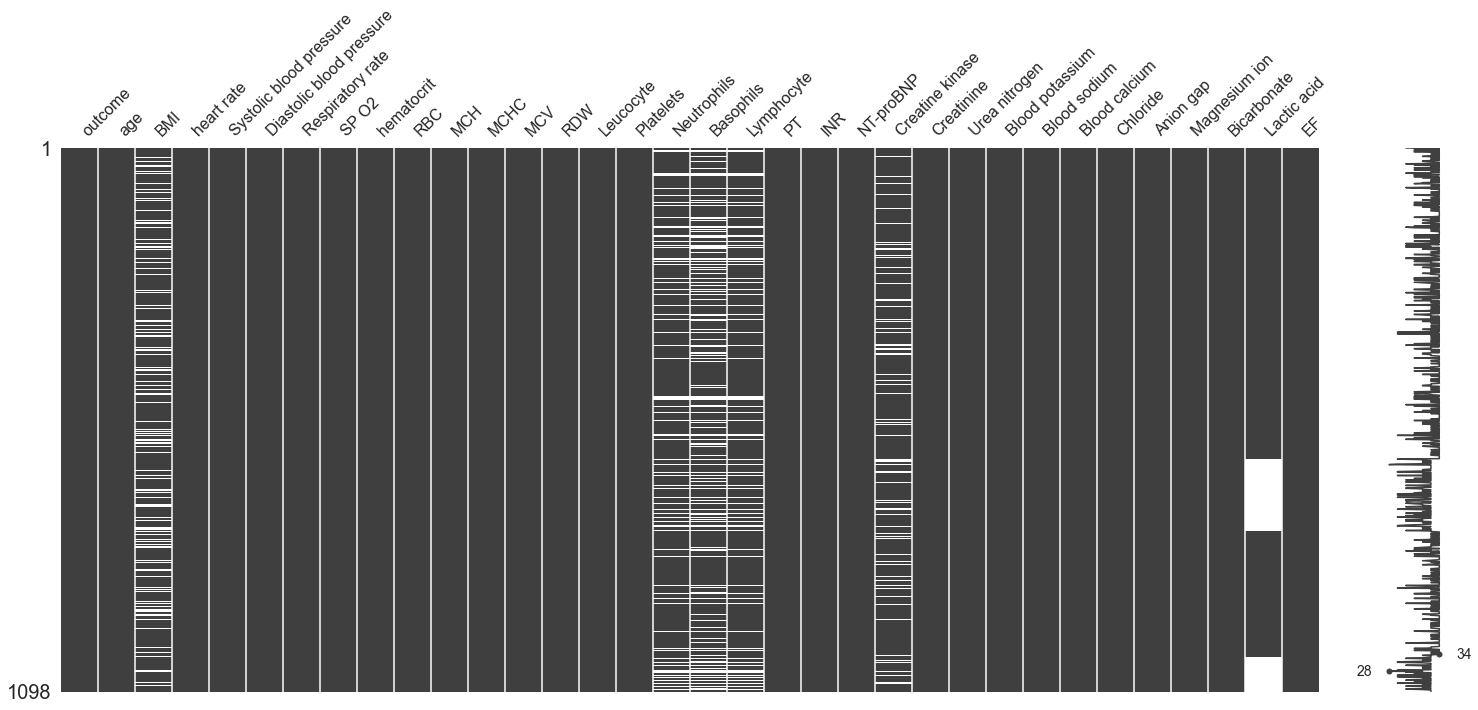

In [54]:
msno.matrix(df)

##### 3. For the remaining missing values we will use the impute method from the sklearn library.

In [55]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   outcome                   1098 non-null   float64
 1   age                       1098 non-null   float64
 2   BMI                       1098 non-null   float64
 3   heart rate                1098 non-null   float64
 4   Systolic blood pressure   1098 non-null   float64
 5   Diastolic blood pressure  1098 non-null   float64
 6   Respiratory rate          1098 non-null   float64
 7   SP O2                     1098 non-null   float64
 8   hematocrit                1098 non-null   float64
 9   RBC                       1098 non-null   float64
 10  MCH                       1098 non-null   float64
 11  MCHC                      1098 non-null   float64
 12  MCV                       1098 non-null   float64
 13  RDW                       1098 non-null   float64
 14  Leucocyt

<Axes: >

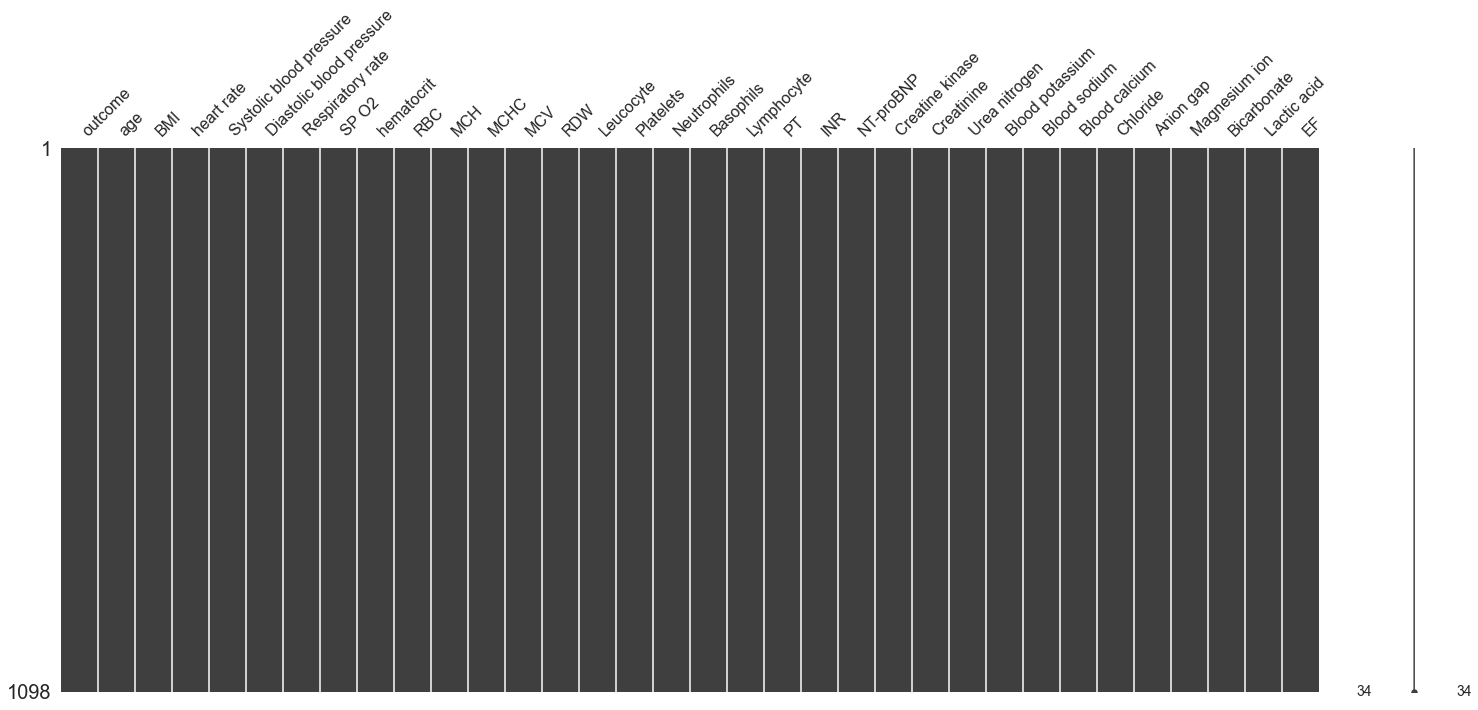

In [56]:
msno.matrix(df)

### **Features Scaling**


#### 1. Standardization

In [57]:
sc=StandardScaler()
df_S = df.copy()
dtypes = df_S.dtypes.apply(lambda x: x.name).to_dict()
df_S[numAttr] = sc.fit_transform(df_S[numAttr])

df_S.mean()
df=df_S.copy()
df

outcome       age       BMI  heart rate  Systolic blood pressure  \
0         0.0  0.026127  1.182823    1.076878                 1.313290   
1         0.0  0.644721 -0.418187   -0.753416                 1.035636   
2         0.0  0.026127  0.228220   -1.030502                 2.298568   
3         0.0  0.103451 -0.702528   -0.636006                 0.010296   
4         0.0 -0.205846  1.193433   -0.922371                -0.675994   
...       ...       ...       ...         ...                      ...   
1093      0.0  0.335424 -0.707554    1.650676                 0.001642   
1094      0.0  1.340639 -0.756696   -0.671461                 0.689984   
1095      0.0  0.258100 -0.510482    1.912867                -0.993889   
1096      0.0  0.799369 -0.748128   -1.988105                 1.181900   
1097      0.0  0.335424  0.654511    0.574743                -1.398802   

      Diastolic blood pressure  Respiratory rate     SP O2  hematocrit  \
0                     0.553161          0.033783  0.283461   -0.231653   
1                     0.203825          0.757641 -0.478920   -0.828224   
2                    -0.109854          0.165709  1.384884   -0.395645   
3                    -0.608079         -0.045763  0.234442   -0.899244   
4                    -1.101863         -0.408531 -0.317838   -0.588530   
...                        ...               ...       ...         ...   
1093                  2.257131          0.049670 -0.848876   -0.611289   
1094                 -0.777642         -0.236825  0.675457    1.430225   
1095                 -0.710337         -0.457811 -1.303893   -0.631474   
1096                 -1.763698         -0.530072  1.160573   -0.830991   
1097                  0.308224          0.342250  1.515732    0.302453   

           RBC  ...  Urea nitrogen  Blood potassium  Blood sodium  \
0    -0.716386  ...      -0.729289         0.724435     -0.036421   
1    -1.557691  ...      -0.089045         4.173747      0.418183   
2    -0.474930  ...       0.343796         1.560632     -0.589852   
3    -0.558844  ...      -0.431429        -0.216287     -0.693621   
4     0.228864  ...       3.474677         1.117447      1.269677   
...        ...  ...            ...              ...           ...   
1093 -0.836978  ...       0.758038        -0.812077     -0.257794   
1094  1.729571  ...       0.514227         2.505534      0.489339   
1095 -0.501999  ...      -0.058611         0.900036     -0.835576   
1096 -0.833788  ...      -0.251360        -0.153572     -0.755882   
1097 -0.215744  ...      -0.011269        -0.174477      0.240295   

      Blood calcium  Chloride  Anion gap  Magnesium ion  Bicarbonate  \
0         -0.612684 -0.752036  -0.925072      -0.966829     1.237024   
1         -0.426252  0.654014  -1.498322       0.176495     0.680149   
2          0.408965  0.396589   0.552147      -1.973863    -0.981249   
3         -0.068302 -1.073440  -0.258119      -1.458988     0.666304   
4          0.483538  0.807565   0.565376      -1.019831    -0.050866   
...             ...       ...        ...            ...          ...   
1093      -0.247277 -0.717788  -0.803808      -1.822429     0.884362   
1094       0.707256 -1.063956   2.152836      -0.574616     0.608155   
1095       3.612968 -0.130724   1.740096      -0.436811    -1.275870   
1096      -0.068302 -0.971825   0.089138      -0.368666     0.347869   
1097      -0.575398  0.301749   0.783652      -0.108200    -0.520903   

      Lactic acid        EF  
0       -1.618520  0.474161  
1       -1.618520 -1.082511  
2       -1.492832  0.474161  
3       -1.492832 -1.082511  
4       -1.461410  0.474161  
...           ...       ...  
1093     0.456731 -0.693343  
1094     0.049501  0.474161  
1095     0.007605 -1.471679  
1096    -0.634801  0.474161  
1097     1.476201 -1.860848  

[1098 rows x 34 columns]

#### 2. Min-Max Scaling:

In [58]:

sc = MinMaxScaler()
df_M = df.copy()

dtypes = df_M.dtypes.apply(lambda x: x.name).to_dict()
df_M[numAttr] = sc.fit_transform(df_M[numAttr])

df_M.head()


outcome     age       BMI  heart rate  Systolic blood pressure  \
0      0.0  0.7000  0.415208    0.655616                 0.604736   
1      0.0  0.8000  0.209323    0.364244                 0.561319   
2      0.0  0.7000  0.292449    0.320134                 0.758805   
3      0.0  0.7125  0.172758    0.382935                 0.400987   
4      0.0  0.6625  0.416572    0.337348                 0.293671   

   Diastolic blood pressure  Respiratory rate     SP O2  hematocrit       RBC  \
0                  0.524024          0.402587  0.754460    0.298141  0.222343   
1                  0.476845          0.518140  0.624273    0.210426  0.088800   
2                  0.434481          0.423647  0.942544    0.274029  0.260670   
3                  0.367193          0.389889  0.746089    0.199984  0.247350   
4                  0.300506          0.331978  0.651780    0.245669  0.372386   

   ...  Urea nitrogen  Blood potassium  Blood sodium  Blood calcium  Chloride  \
0  ...       0.127573         0.505814      0.529614       0.342337  0.351062   
1  ...       0.242775         0.985465      0.583794       0.368509  0.550813   
2  ...       0.320657         0.622093      0.463656       0.485762  0.514242   
3  ...       0.181168         0.375000      0.451289       0.418760  0.305401   
4  ...       0.884008         0.560465      0.685275       0.496231  0.572627   

   Anion gap  Magnesium ion  Bicarbonate  Lactic acid        EF  
0   0.263621       0.272516     0.591427     0.000000  0.666667  
1   0.184424       0.423248     0.508892     0.000000  0.333333  
2   0.467705       0.139752     0.262654     0.016807  0.666667  
3   0.355763       0.207631     0.506840     0.016807  0.333333  
4   0.469533       0.265528     0.400547     0.021008  0.666667  

[5 rows x 34 columns]

 ###  **Data Balancing : SMOTE Method**


In [59]:
labels = df_S.outcome.astype(int)
features = df_S.drop('outcome', axis=1)
# setting up testing and training sets
features_train_sm, features_test_sm, labels_train_sm, labels_test_sm = train_test_split(features, labels, test_size=0.25, random_state=42)

sm = SMOTE(random_state=42)
features_train_sm, labels_train_sm = sm.fit_resample(features_train_sm, labels_train_sm)



## **ML Models with evalutaion**

### K-Nearest Neighbors

In [60]:

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(features_train_sm, labels_train_sm)

predictions = neigh.predict(features_test_sm)

In [61]:
cf_matrix= confusion_matrix(labels_test_sm,predictions)
tn, fp, fn, tp = cf_matrix.ravel()
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score= 2 * (precision * recall) / (precision + recall)
RMSE=mean_squared_error(labels_test_sm,predictions)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1_score: {}".format(f1_score))
print("RMSE: {}".format(RMSE))

Accuracy: 0.7127272727272728
Precision: 0.20481927710843373
Recall: 0.5666666666666667
F1_score: 0.3008849557522124
RMSE: 0.2872727272727273


<Axes: >

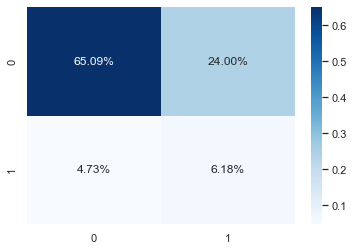

In [62]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### Descision tree

In [63]:

# Fit regression model
regr_1 = DecisionTreeRegressor()
regr_1.fit(features_train_sm, labels_train_sm)


# Predict
predictions = regr_1.predict(features_test_sm)


In [64]:
cf_matrix= confusion_matrix(labels_test_sm,predictions)
tn, fp, fn, tp = cf_matrix.ravel()
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score= 2 * (precision * recall) / (precision + recall)
RMSE=mean_squared_error(labels_test_sm,predictions)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1_score: {}".format(f1_score))
print("RMSE: {}".format(RMSE))

Accuracy: 0.7890909090909091
Precision: 0.1956521739130435
Recall: 0.3
F1_score: 0.23684210526315788
RMSE: 0.2109090909090909


<Axes: >

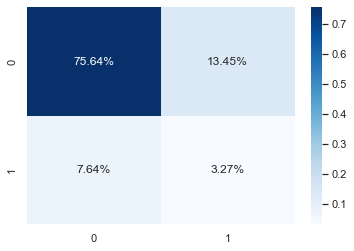

In [65]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### Random Forest

In [66]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(features_train_sm,labels_train_sm);

# Use the forest's predict method on the test data
predictions = rf.predict(features_test_sm)
predictions = np.around(predictions)


In [67]:
cf_matrix= confusion_matrix(labels_test_sm,predictions)
tn, fp, fn, tp = cf_matrix.ravel()
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score= 2 * (precision * recall) / (precision + recall)
RMSE = mean_squared_error(labels_test_sm,predictions)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1_score: {}".format(f1_score))
print("RMSE: {}".format(RMSE))

Accuracy: 0.8690909090909091
Precision: 0.375
Recall: 0.3
F1_score: 0.33333333333333326
RMSE: 0.13090909090909092


<Axes: >

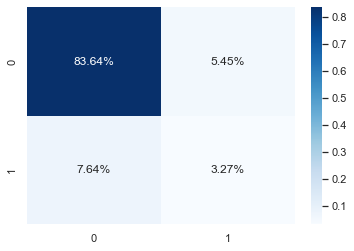

In [68]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### b. PCA

In [69]:
features = df
labels = np.array(features['outcome'])
# Remove the labels from the features
features= features.drop('outcome', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
#print(train_labels, test_labels)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_features)
# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)


# Make an instance of the Model
pca = PCA(.95)
pca.fit(train_features)
train_features = pca.transform(train_features)
test_features = pca.transform(test_features)

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_features, train_labels)
logisticRegr.predict(test_features[0].reshape(1,-1))
logisticRegr.predict(test_features[0:10])
print('The PCA scored for the given dataset',(logisticRegr.score(test_features, test_labels))*100,'% accuracy.')

The PCA scored for the given dataset 90.18181818181819 % accuracy.


In [70]:
features_names=df.columns.drop('outcome')
n_pcs=pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = set([features_names[most_important[i]] for i in range(n_pcs)])


In [71]:
for val in df.columns.tolist():
  if val!='outcome':
    if val not in most_important_names:
      df=df.drop(val,axis=1)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   outcome                  1098 non-null   float64
 1   age                      1098 non-null   float64
 2   BMI                      1098 non-null   float64
 3   heart rate               1098 non-null   float64
 4   Systolic blood pressure  1098 non-null   float64
 5   MCH                      1098 non-null   float64
 6   MCV                      1098 non-null   float64
 7   RDW                      1098 non-null   float64
 8   Leucocyte                1098 non-null   float64
 9   Platelets                1098 non-null   float64
 10  Basophils                1098 non-null   float64
 11  Lymphocyte               1098 non-null   float64
 12  INR                      1098 non-null   float64
 13  NT-proBNP                1098 non-null   float64
 14  Blood potassium         

### Kmeans++

In [73]:
kmeans_model = KMeans(n_clusters=2, random_state=77, init="k-means++").fit(features_train_sm)

predictions = kmeans_model.predict(features_test_sm)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
cf_matrix= confusion_matrix(labels_test_sm,predictions)
tn, fp, fn, tp = cf_matrix.ravel()
accuracy= (tn+tp) / (tn+ fp+ fn+ tp)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score= 2 * (precision * recall) / (precision + recall)
RMSE=mean_squared_error(labels_test_sm,predictions)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1_score: {}".format(f1_score))
print("RMSE: {}".format(RMSE))

Accuracy: 0.7781818181818182
Precision: 0.25396825396825395
Recall: 0.5333333333333333
F1_score: 0.3440860215053763
RMSE: 0.22181818181818183


<Axes: >

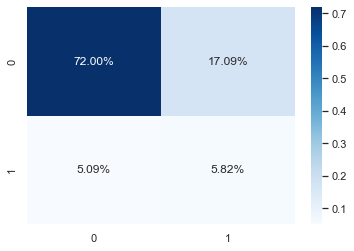

In [75]:
sb.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.2%',cmap='Blues')

### Adaboost

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming features and labels are already defined

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Initialize AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_model.fit(features_train, labels_train)

# Make predictions on the test set
predictions = adaboost_model.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
f1 = f1_score(labels_test, predictions)
roc_auc = roc_auc_score(labels_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8618181818181818
Precision: 0.3
Recall: 0.2
F1 Score: 0.24
ROC AUC Score: 0.5714285714285714
